# **6. Decision Trees and Ensemble Learning**

# **6.1 Credit Risk Scoring Project** (video 1)

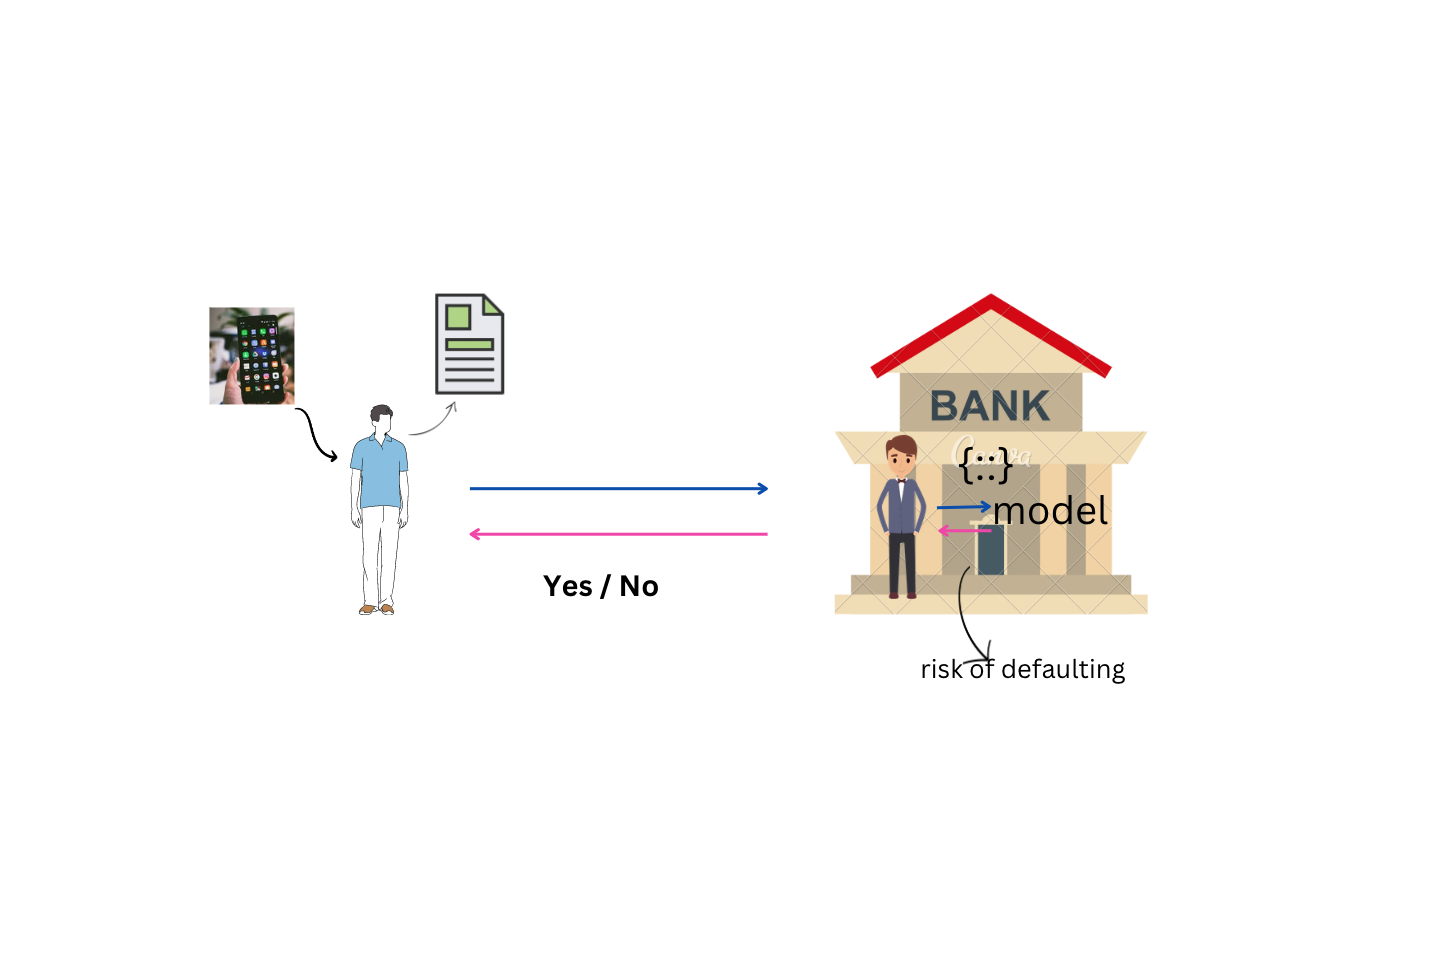


* Credit risk scoring so imagine that you want to buy a mobile phone what you do is you come to a bank, let's say this is the number of the phone you want to buy you come to a bank and you want to get a loan to buy this mobile phone you fill in some application form asks some basic statistics about you like, about your income how much this item costs, how much money you need to buy this item whether you own a house or whether you're house, how much money you have in general, how much money you earn, how much experience you have things like this, you fill in the application and send it to the bank and you ask for money and then the bank look at this application and they say okay here you go, they say yes or they can say no sorry we're not giving you any money and the bank is doing this by analyzing the application you built in by analyzing what they know about you already and what we want to do in this lesson is we want to build a model that the bank can use to make this decision if they should lend the money or not and the bank can give this to the model how much money they want to lend and so on and what the model will respond with will be, what is the risk that this customer is not going to pay back and this is called default, so the model will return the probability or risk that this customer is going to default, defaulting, and then the bank can use this service to make a decision decide the money to the customer or not the way we can do this as a bank the way we can build this model is can analyze all the customers, we have all the history we have, so have some information about the customers.

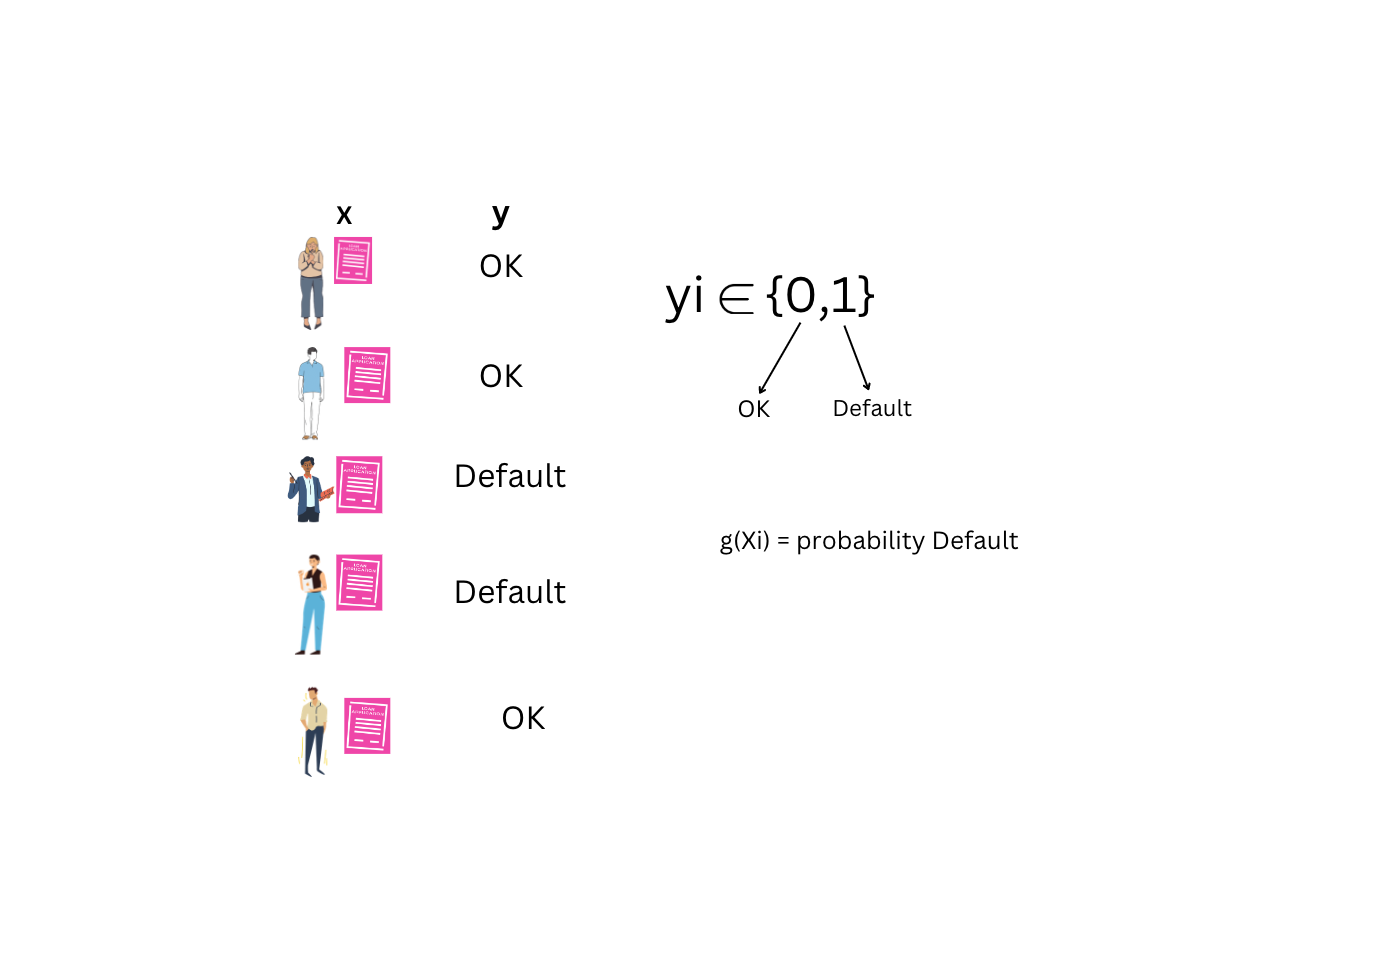

* About their application so we have a lot of history like that and then for each of these applications we know how much money they asked and whether they were able to pay back the loan or not for example this customer was able to pay back the loan ok, this customer was able to pay back the loan ok, but this one didn't they **default**
they say okay sorry I don't have any money there is nothing I can pay you with and this is the station the bank wants to avoid, let's say this one is also the default and this one is okay, so what we have here is we have a binary classification problem where **y** in our case, like it's a binary, can be zero or one zero, in this case, zero is **okay** and one is **default** and we want to train the model that for each new customer gives us the probability that this customer is going to default so what we want to do is we want  to train a model, model **g** for a new customer will give us the probability of default, what we have here, so this is our training dataset so we have **y** is our target variable and we have our **X** and **X** is all the information about the users that we have which included their income the price of the item and things like this so basically all the information that we have on the application that the clients make plus some of the information we already know about the customer if they are our clients already, this is what our features are and this is what we will use to predict if a new customer is going to be able to pay back the loan or they are going to default the dataset will use for that.

The raw dataset is in the file **"CreditScoring.csv"** which contains 4455 rows and 14 columns:

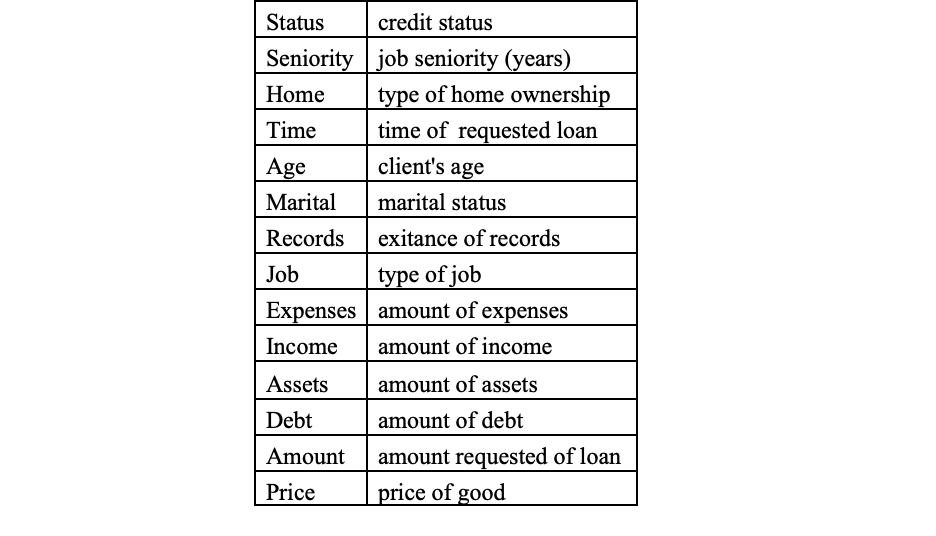

* We have here all this information and status is actually if they default or not and a description of what each column means so here status is credit styles status default node the what we also have is seniority is like, how many years of experience the have whether they own home or not, for how long they have the loan, the **age of the client**, the marital status if they have, so this one **existence of records** if they have a prior history of taking credit with this one. I'm not sure about this one to be, the **kind of job** and how much money they spend, how much money they earn, how much money they have in general, how much money they owe, how much debt they have already and amount **requested of loan** how much money they requested and how much at the **price of good** they think they want to buy a phone.

Source https://github.com/gastonstat/CreditScoring

To download the dataset, run

wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv


In [ ]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

--2022-10-19 08:14:01--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2022-10-19 08:14:01--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.003s  

2022-10-19 08:14:01 (61.4 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [ ]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")

# **6.2 Data cleaning and preparation** (video 2)


* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [ ]:
df = pd.read_csv('CreditScoring.csv')

In [ ]:
df.head()

Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   Income  Assets  Debt  Amount  Price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [ ]:
df.columns = df.columns.str.lower()
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

Categorical variables are represented by numbers. For converting, we'll use the following map (extracted from Part1_CredScoring_Processing.R). It's code in R which we'll translate to Pandas.

* levels(dd$Status) = c("good", "bad")

* levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")

* levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

* levels(dd$Records) = c("no_rec", "yes_rec")

* levels(dd$Job) = c("fixed", "partime", "freelance", "others")

Let's convert it:


In [ ]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [ ]:
df.status.map({1:'ok', 2:'default', 0:'unk'})

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [ ]:
#df.status = df.status.map({1:'ok', 2:'default', 0:'unk'})
#df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       ok          9     1    60   30        2        1    3        73   
1       ok         17     1    60   58        3        1    1        48   
2  default         10     2    36   46        2        2    3        90   
3       ok          0     1    60   24        1        1    1        63   
4       ok          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

Now the status are more meaninful



In [ ]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       ok          9     1    60   30        2        1    3        73   
1       ok         17     1    60   58        3        1    1        48   
2  default         10     2    36   46        2        2    3        90   
3       ok          0     1    60   24        1        1    1        63   
4       ok          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [ ]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [ ]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [ ]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)


In [ ]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [ ]:
df.head()

status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

After this, all the categorical variables have strings, not numbers

Let's look at numerical variables:

In [ ]:
df.describe().round()

seniority    time     age  expenses      income      assets  \
count     4455.0  4455.0  4455.0    4455.0      4455.0      4455.0   
mean         8.0    46.0    37.0      56.0    763317.0   1060341.0   
std          8.0    15.0    11.0      20.0   8703625.0  10217569.0   
min          0.0     6.0    18.0      35.0         0.0         0.0   
25%          2.0    36.0    28.0      35.0        80.0         0.0   
50%          5.0    48.0    36.0      51.0       120.0      3500.0   
75%         12.0    60.0    45.0      72.0       166.0      6000.0   
max         48.0    72.0    68.0     180.0  99999999.0  99999999.0   

             debt  amount    price  
count      4455.0  4455.0   4455.0  
mean     404382.0  1039.0   1463.0  
std     6344253.0   475.0    628.0  
min           0.0   100.0    105.0  
25%           0.0   700.0   1118.0  
50%           0.0  1000.0   1400.0  
75%           0.0  1300.0   1692.0  
max    99999999.0  5000.0  11140.0

In [ ]:
df.income.max()

99999999

99999999 indicates missing values. Let's replace it with NaN:



In [ ]:
df.income.replace(to_replace=99999999, value=np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [ ]:
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [ ]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
df.describe().round()

seniority    time     age  expenses  income    assets     debt  amount  \
count     4455.0  4455.0  4455.0    4455.0  4421.0    4408.0   4437.0  4455.0   
mean         8.0    46.0    37.0      56.0   131.0    5403.0    343.0  1039.0   
std          8.0    15.0    11.0      20.0    86.0   11573.0   1246.0   475.0   
min          0.0     6.0    18.0      35.0     0.0       0.0      0.0   100.0   
25%          2.0    36.0    28.0      35.0    80.0       0.0      0.0   700.0   
50%          5.0    48.0    36.0      51.0   120.0    3000.0      0.0  1000.0   
75%         12.0    60.0    45.0      72.0   165.0    6000.0      0.0  1300.0   
max         48.0    72.0    68.0     180.0   959.0  300000.0  30000.0  5000.0   

         price  
count   4455.0  
mean    1463.0  
std      628.0  
min      105.0  
25%     1118.0  
50%     1400.0  
75%     1692.0  
max    11140.0

* The nines are already gone.

In [ ]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

* There is one unknown here, we're interested in ok and default values.

In [ ]:
df[df.status != 'unk']

status  seniority   home  time  age  marital records        job  \
0          ok          9   rent    60   30  married      no  freelance   
1          ok         17   rent    60   58    widow      no      fixed   
2     default         10  owner    36   46  married     yes  freelance   
3          ok          0   rent    60   24   single      no      fixed   
4          ok          0   rent    36   26   single      no      fixed   
...       ...        ...    ...   ...  ...      ...     ...        ...   
4450  default          1   rent    60   39  married      no      fixed   
4451       ok         22  owner    60   46  married      no      fixed   
4452  default          0  owner    24   37  married      no    partime   
4453       ok          0   rent    48   23   single      no  freelance   
4454       ok          5  owner    60   32  married      no  freelance   

      expenses  income  assets    debt  amount  price  
0           73   129.0     0.0     0.0     800    846  
1           48   131.0     0.0     0.0    1000   1658  
2           90   200.0  3000.0     0.0    2000   2985  
3           63   182.0  2500.0     0.0     900   1325  
4           46   107.0     0.0     0.0     310    910  
...        ...     ...     ...     ...     ...    ...  
4450        69    92.0     0.0     0.0     900   1020  
4451        60    75.0  3000.0   600.0     950   1263  
4452        60    90.0  3500.0     0.0     500    963  
4453        49   140.0     0.0     0.0     550    550  
4454        60   140.0  4000.0  1000.0    1350   1650  

[4454 rows x 14 columns]

* We removed and somewhere here (4450) the index jumps one records

In [ ]:
df = df[df.status != 'unk'].reset_index(drop=True)

There's one record for which the status is unknown. Let's remove it - it's not useful for us

Now we're ready to prepare the data for training:

* First, do a train-validation-test split
* Then, apply one-hot encoding to categorical features and get the feature matrix


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [ ]:
df_train

status  seniority     home  time  age  marital records        job  \
951   default         10    owner    36   36  married      no  freelance   
688   default          6  parents    48   32   single     yes      fixed   
2233       ok          1  parents    48   40  married      no      fixed   
3304  default          1  parents    48   23   single      no    partime   
2271       ok          5    owner    36   46  married      no  freelance   
...       ...        ...      ...   ...  ...      ...     ...        ...   
2382       ok         18  private    36   45  married      no      fixed   
1784       ok          7  private    60   29  married      no      fixed   
808        ok          1  parents    24   19   single      no      fixed   
1857       ok         15    owner    48   43  married      no  freelance   
488        ok         12    owner    48   27  married     yes      fixed   

      expenses  income   assets    debt  amount  price  
951         75     0.0  10000.0     0.0    1000   1400  
688         35    85.0      0.0     0.0    1100   1330  
2233        75   121.0      0.0     0.0    1320   1600  
3304        35    72.0      0.0     0.0    1078   1079  
2271        60   100.0   4000.0     0.0    1100   1897  
...        ...     ...      ...     ...     ...    ...  
2382        45   220.0  20000.0     0.0     800   1600  
1784        60    51.0   3500.0   500.0    1000   1290  
808         35    28.0      0.0     0.0     400    600  
1857        60   100.0  18000.0     0.0    2500   2976  
488         45   110.0   5000.0  1300.0     450   1636  

[2672 rows x 14 columns]

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

In [ ]:
df_train.status == 'default'

0        True
1        True
2       False
3        True
4       False
        ...  
2667    False
2668    False
2669    False
2670    False
2671    False
Name: status, Length: 2672, dtype: bool

In [ ]:
(df_train.status == 'default').astype('int')

0       1
1       1
2       0
3       1
4       0
       ..
2667    0
2668    0
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int64

In [ ]:
(df_train.status == 'default').astype('int').values

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [ ]:
del df_train['status']
del df_val['status']
del df_test['status']


In [ ]:
df_train

seniority     home  time  age  marital records        job  expenses  \
0            10    owner    36   36  married      no  freelance        75   
1             6  parents    48   32   single     yes      fixed        35   
2             1  parents    48   40  married      no      fixed        75   
3             1  parents    48   23   single      no    partime        35   
4             5    owner    36   46  married      no  freelance        60   
...         ...      ...   ...  ...      ...     ...        ...       ...   
2667         18  private    36   45  married      no      fixed        45   
2668          7  private    60   29  married      no      fixed        60   
2669          1  parents    24   19   single      no      fixed        35   
2670         15    owner    48   43  married      no  freelance        60   
2671         12    owner    48   27  married     yes      fixed        45   

      income   assets    debt  amount  price  
0        0.0  10000.0     0.0    1000   1400  
1       85.0      0.0     0.0    1100   1330  
2      121.0      0.0     0.0    1320   1600  
3       72.0      0.0     0.0    1078   1079  
4      100.0   4000.0     0.0    1100   1897  
...      ...      ...     ...     ...    ...  
2667   220.0  20000.0     0.0     800   1600  
2668    51.0   3500.0   500.0    1000   1290  
2669    28.0      0.0     0.0     400    600  
2670   100.0  18000.0     0.0    2500   2976  
2671   110.0   5000.0  1300.0     450   1636  

[2672 rows x 13 columns]

* We don't have a status column here anymore, we have all features here. Let's use them for training a decision trees.

Now we're ready to train a model. We'll start with decision trees

# **6.3 Decision Trees** (video 3)

* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

Notes
___

Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on a bunch of if/else statements by splitting a node into two or more sub-nodes.

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits because of its depth. It tends to memorize all the patterns in the train data but struggle to performs well on the unseen data (validation or test set).

To overcome with overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.

The decision tree with only a single depth is called decision stump and it only has one split from the root.

Classes, functions, and methods:

* DecisionTreeClassifier: classification model from sklearn.tree class.
* max_depth: hyperparameter to control the depth of the decision tree algorithm.
* export_text: method from sklearn.tree class to display the text report showing the rules of a decision tree.

We'll use DecisionTreeClassifier and for evaluating the quality of our models, we'll use AUC

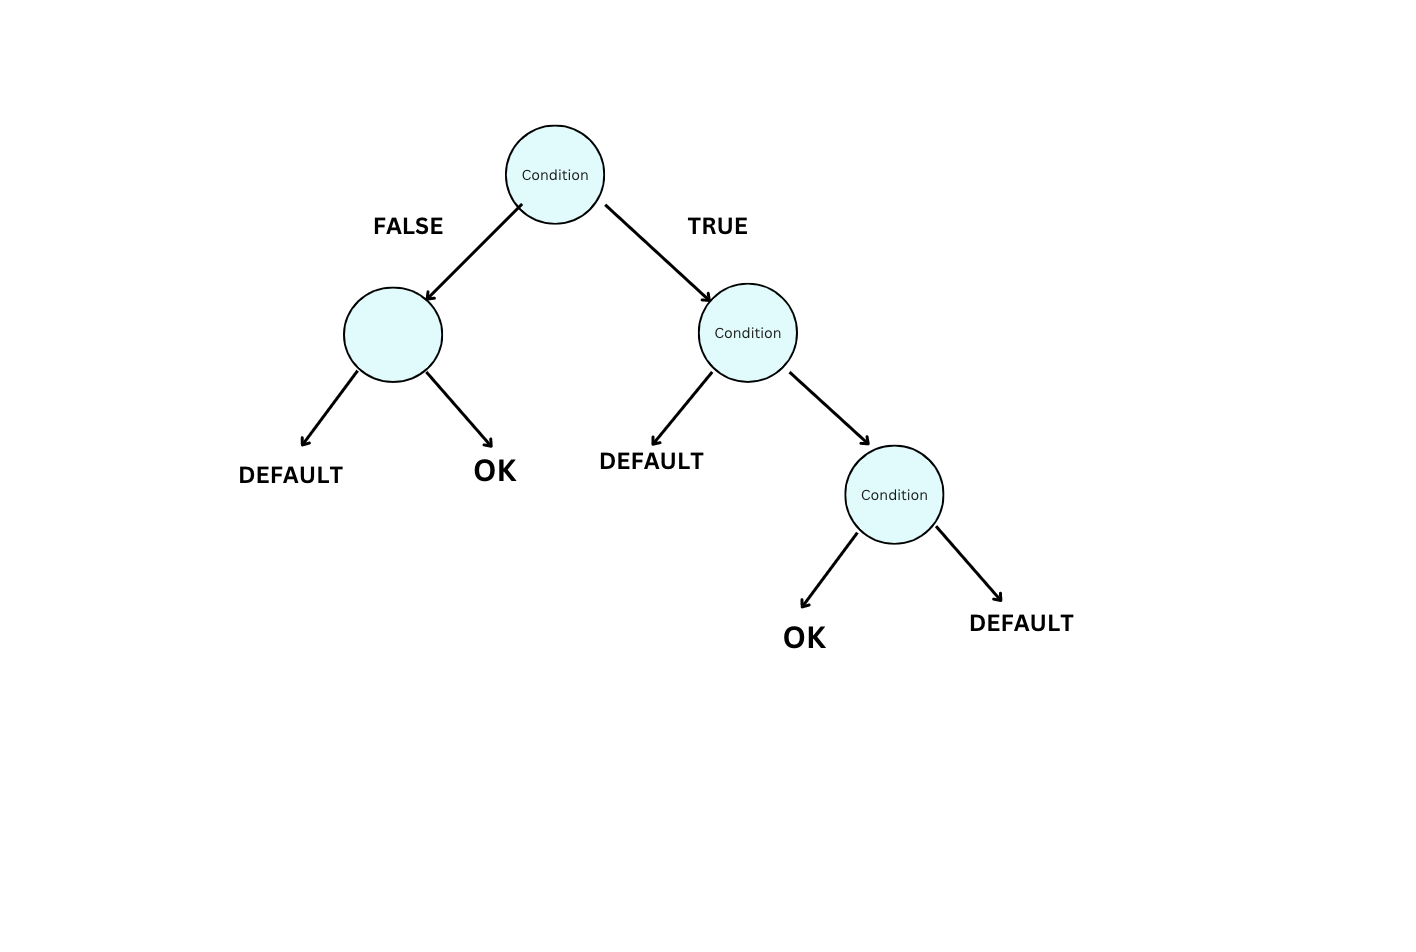

* **Decision Trees** is a data structure that looks like we have a node here so here we have some condition and then depending on whether this condition is true or false, it's true we go to the **right** and if it's false we go to the **left** and then we repeat it so here we can have some condition again and finally at the end we need to make a decision this is **default** and this **okay** here the decision could be also the default and okay and default the condition can be so let's say from our dataset.

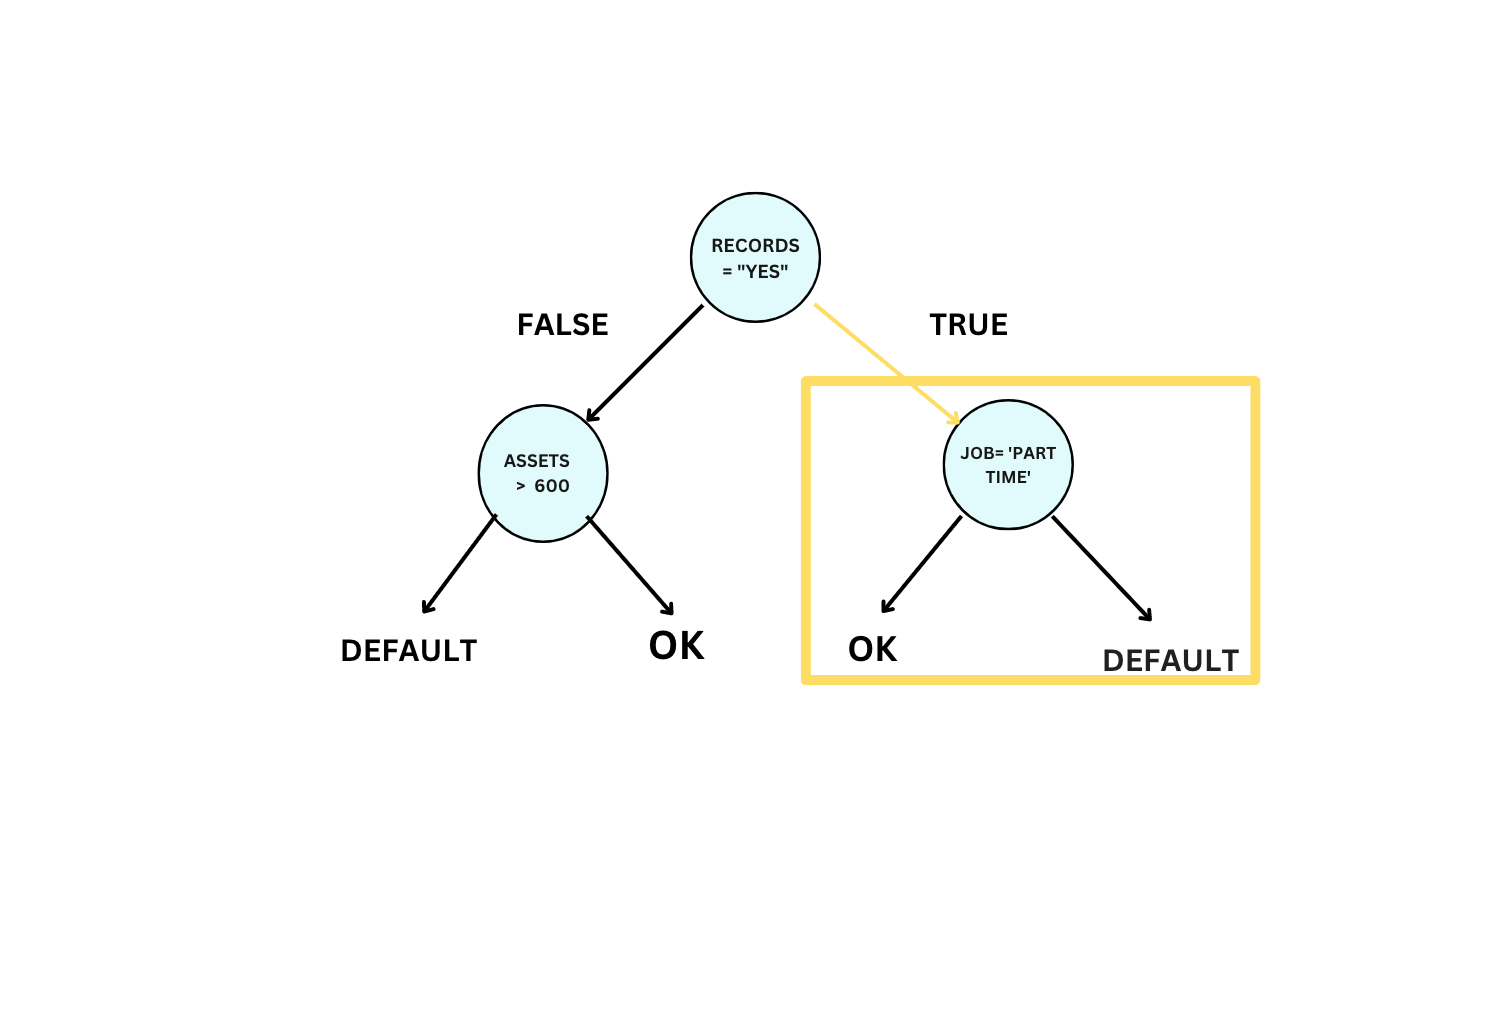

* Example records, so let's say we already know that this customer has previous records, so records **yes** if this is true we go here yellow color, if this is false if the client doesn't have any records then go to this way yellow color, and another condition could be if the job is part-time, if the customer has records and job is part-time then the decision could be a default if the job is not part-time then the decision is okay, so for example on the left the condition could be how much money they have like assets more than let's say six thousand so this number is arbitrary.

In [ ]:
def assess_risk(client):
  if client['records'] == 'yes':
    if client['job'] == 'parttime':
        return 'default'
    else:
        return 'ok'
  else:
    if client['assets'] > 6000:
        return 'ok'
    else:
      return 'default'



In [ ]:
df_train.iloc[0]

seniority           10
home             owner
time                36
age                 36
marital        married
records             no
job          freelance
expenses            75
income             0.0
assets         10000.0
debt               0.0
amount            1000
price             1400
Name: 0, dtype: object

In [ ]:
df_train.iloc[0].to_dict()

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [ ]:
xi = df_train.iloc[0].to_dict()

In [ ]:
assess_risk(xi)

'ok'

In [ ]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

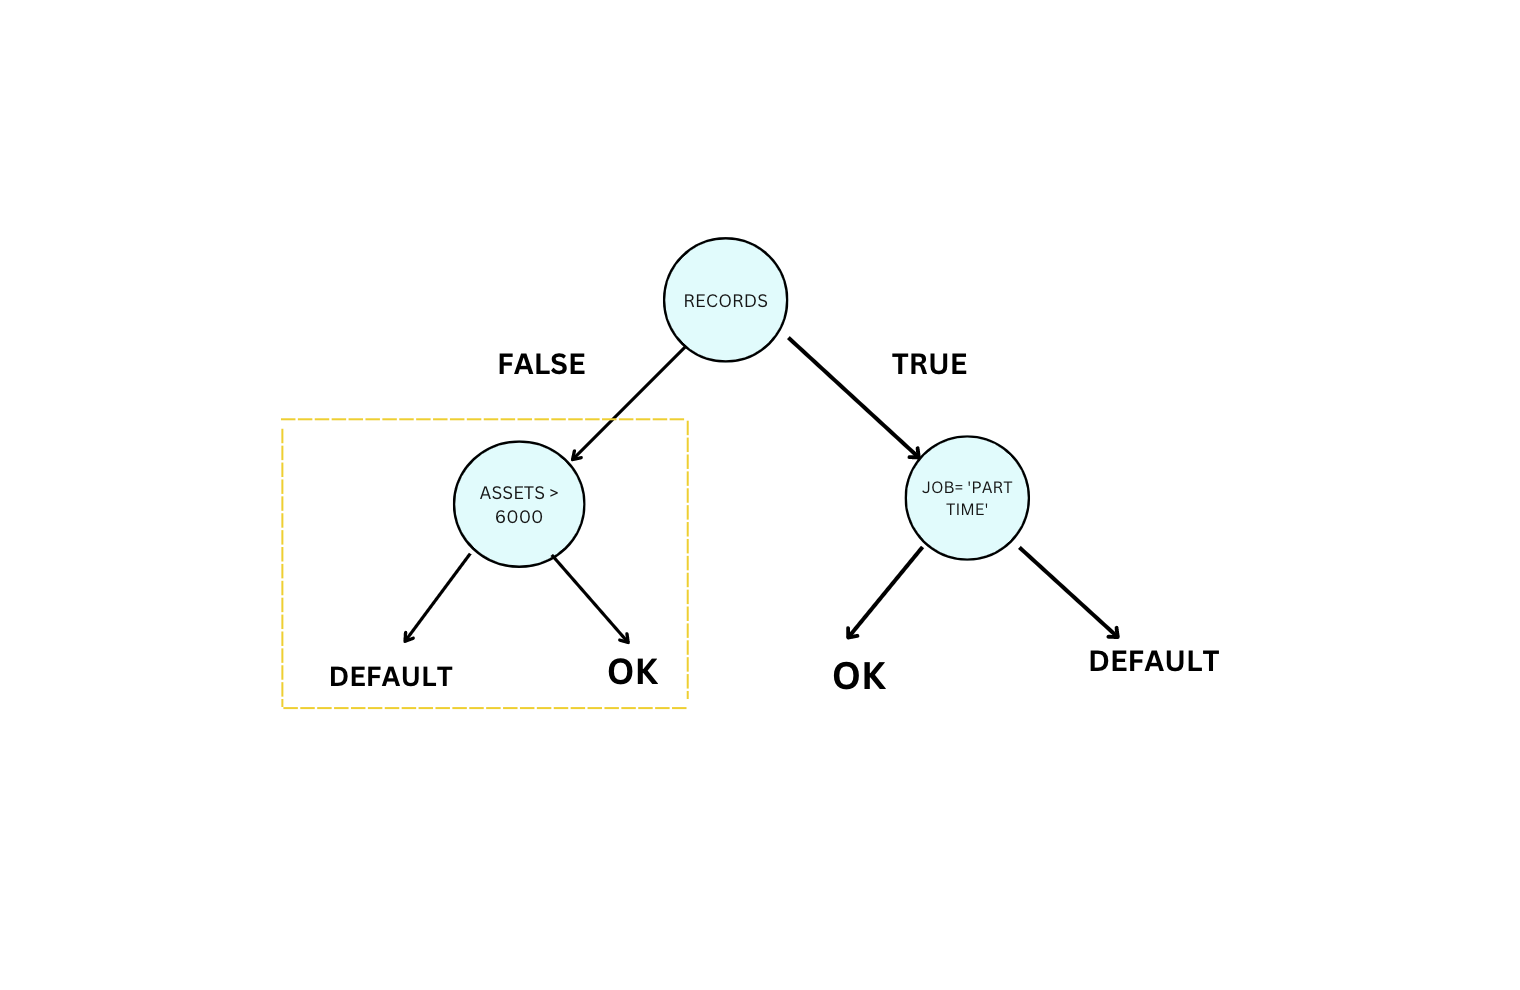

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

We'll use DecisionTreeClassifier and for evaluating the quality of our models, we'll use AUC

In [ ]:
train_dicts = df_train.to_dict(orient='records')


In [ ]:
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [ ]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

* Try to look at the features names

Now we're going to train our decision tree

In [ ]:
#dv = DictVectorizer(sparse=False)
#X_train = dv.fit_transform(train_dicts)

In [ ]:
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)

ValueError: ignored

Let's fit the tree with default parameters

* The input contains NaN we remember the line we replaced them na's

In [ ]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

We'll replace them with "0" like in Chapter 2

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6656293138940689

To get the predictions (probabilities), we use predict_proba. Let's check AUC on train data:

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)


1.0

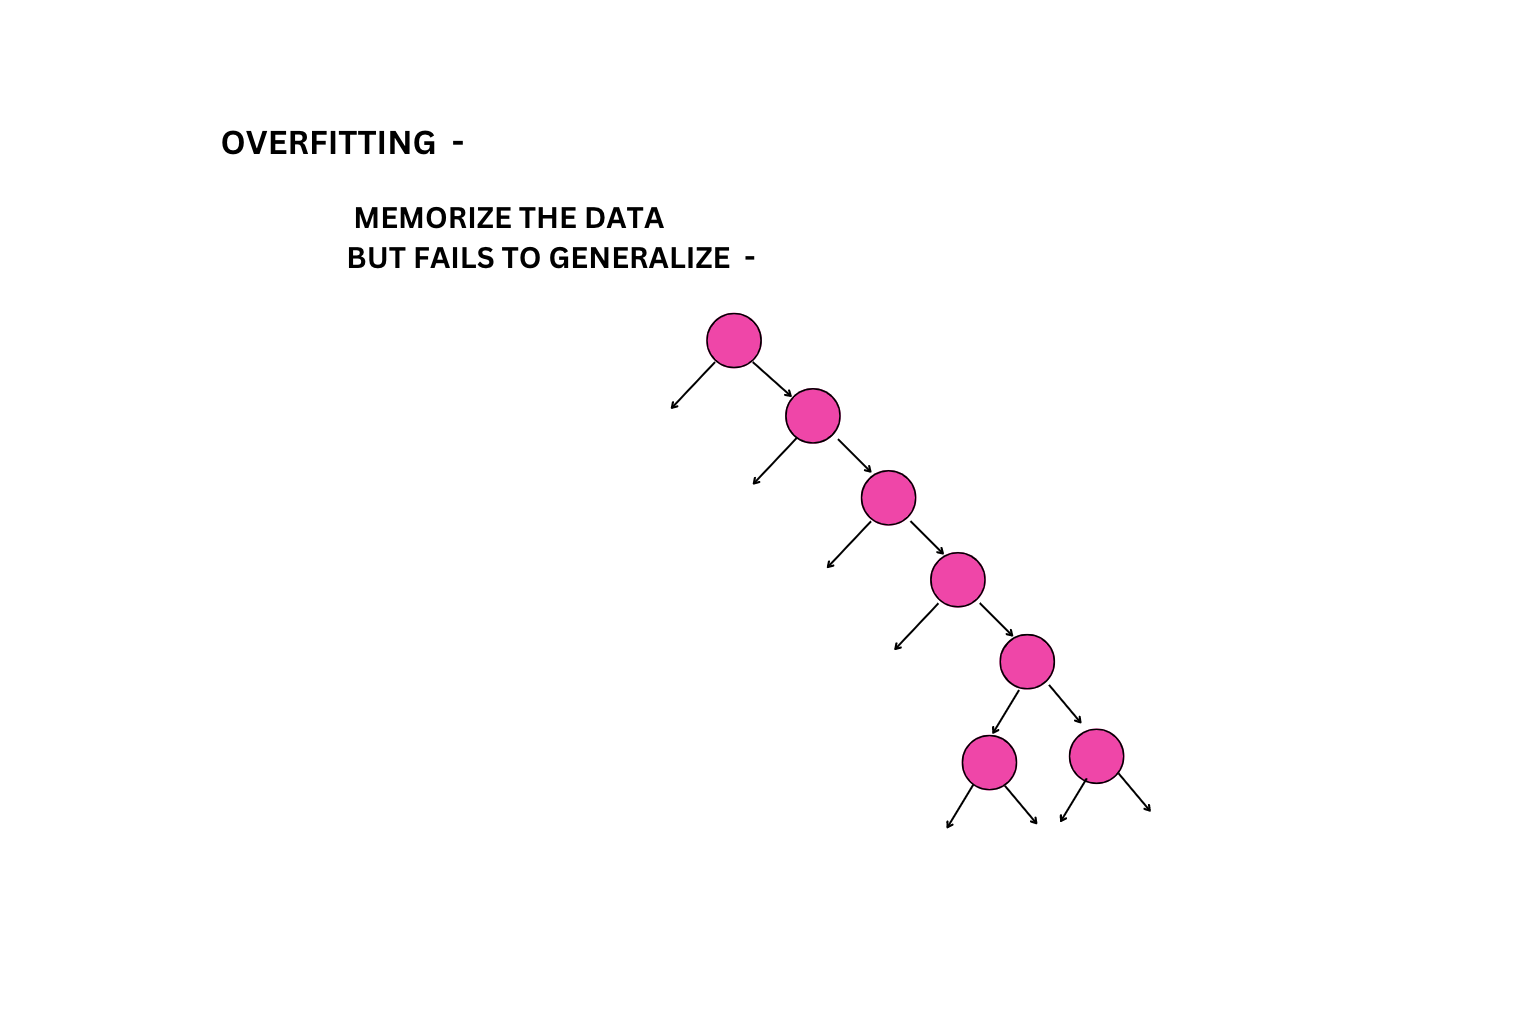

* Overfitting is when our model simply memorize the data, it memorize the data but fails to generalize because for new unseen example none of the memorized examples look like this new one and just okay.

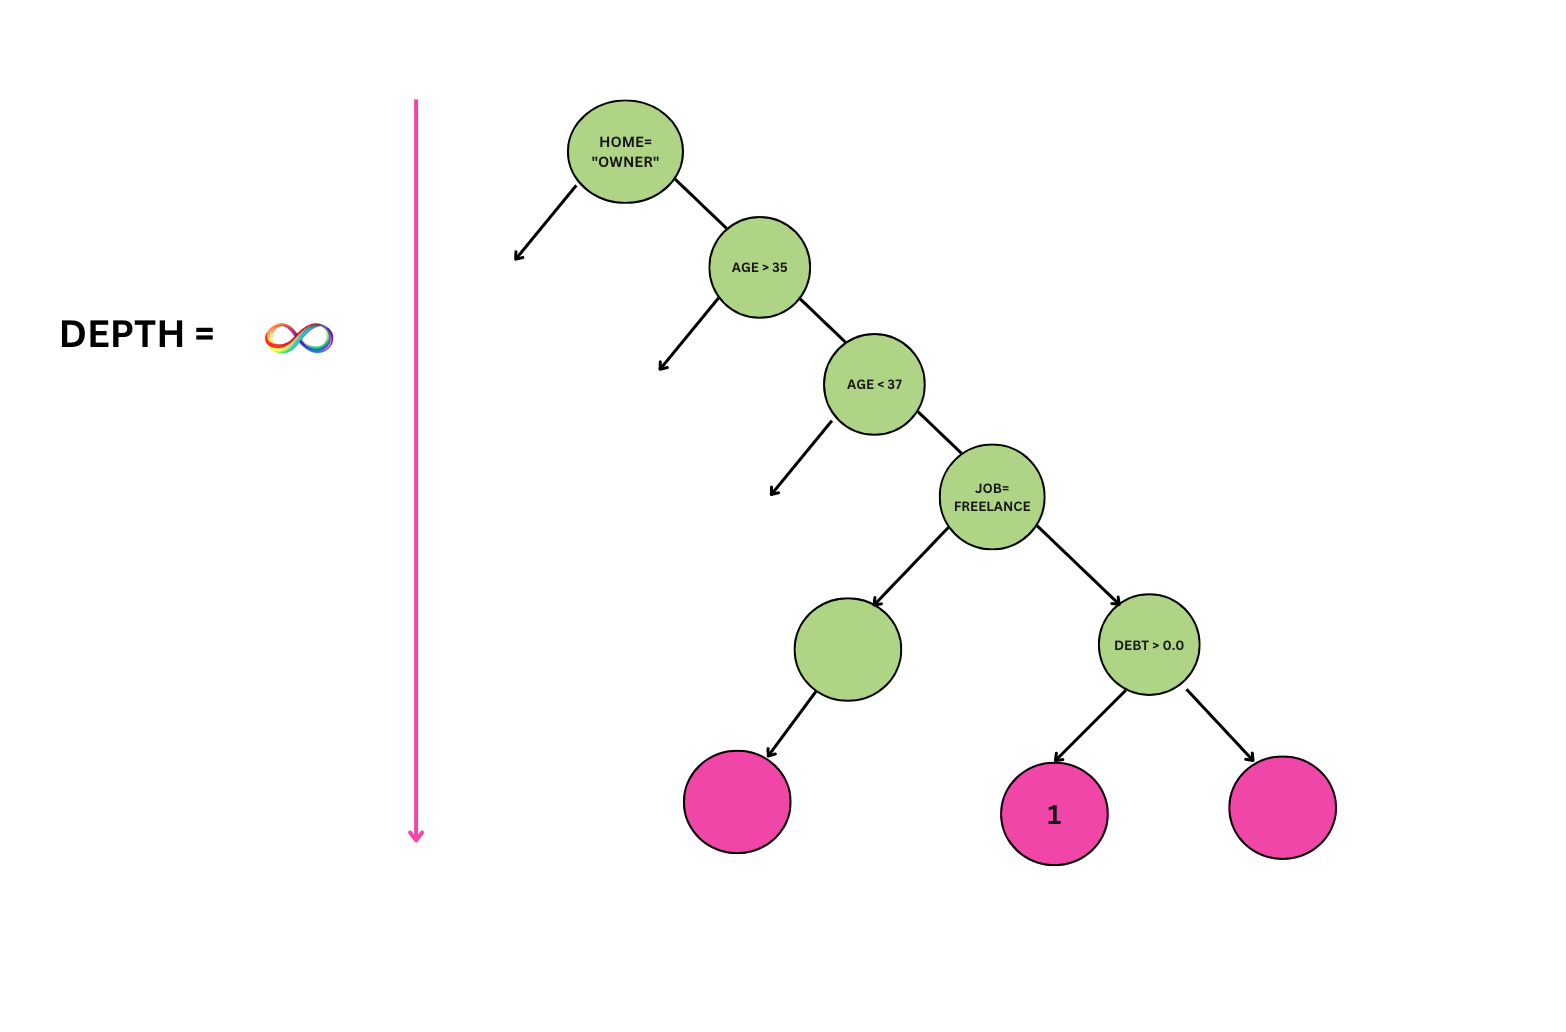 


* We have a bunch of nodes here and let's say we want to train this model to score the customer, we have **xi** customer and we know that this **xi** they did default and let's say for this customer so let's say if home = "owner", Age more than 35, Age less than 37, we select only customer that have age 36 and have home and then say job freelance, debt they have zero debt so more than zero and with this rule, this rule is very specific and maybe only this one person ends up here and the model learned that the person defaulted and this rule is very specific they have a house they are 36 years old they are freelancers they have zero debt yet they defaulted and when we see a new user a new customer who has the same profile as that here we will also think that they are going to default simply because of that so here our model memorized the data so it memorized that for this specific customer they defaulted so it learned that and it has a rule like that for every record we have in our dataset that's why it memorized the data but these patterns didn't hold for the validation dataset that's why for the validation dataset our AUC was very bad but on the training dataset it was excellent so the model was able to classify everyone from the training dataset correctly

* Arrow down the red color, happened if we can see this our tree is quite deep here so it's six or seven so basically if we let our tree grow too deep our model can learn any possible combination any possible customers and then at the end when we have this decision it will contain only just one or two clients so this way we let our tree memorize the data.

* So here depth is unrestricted so it can go down as much as it wants, but if we stick the depth

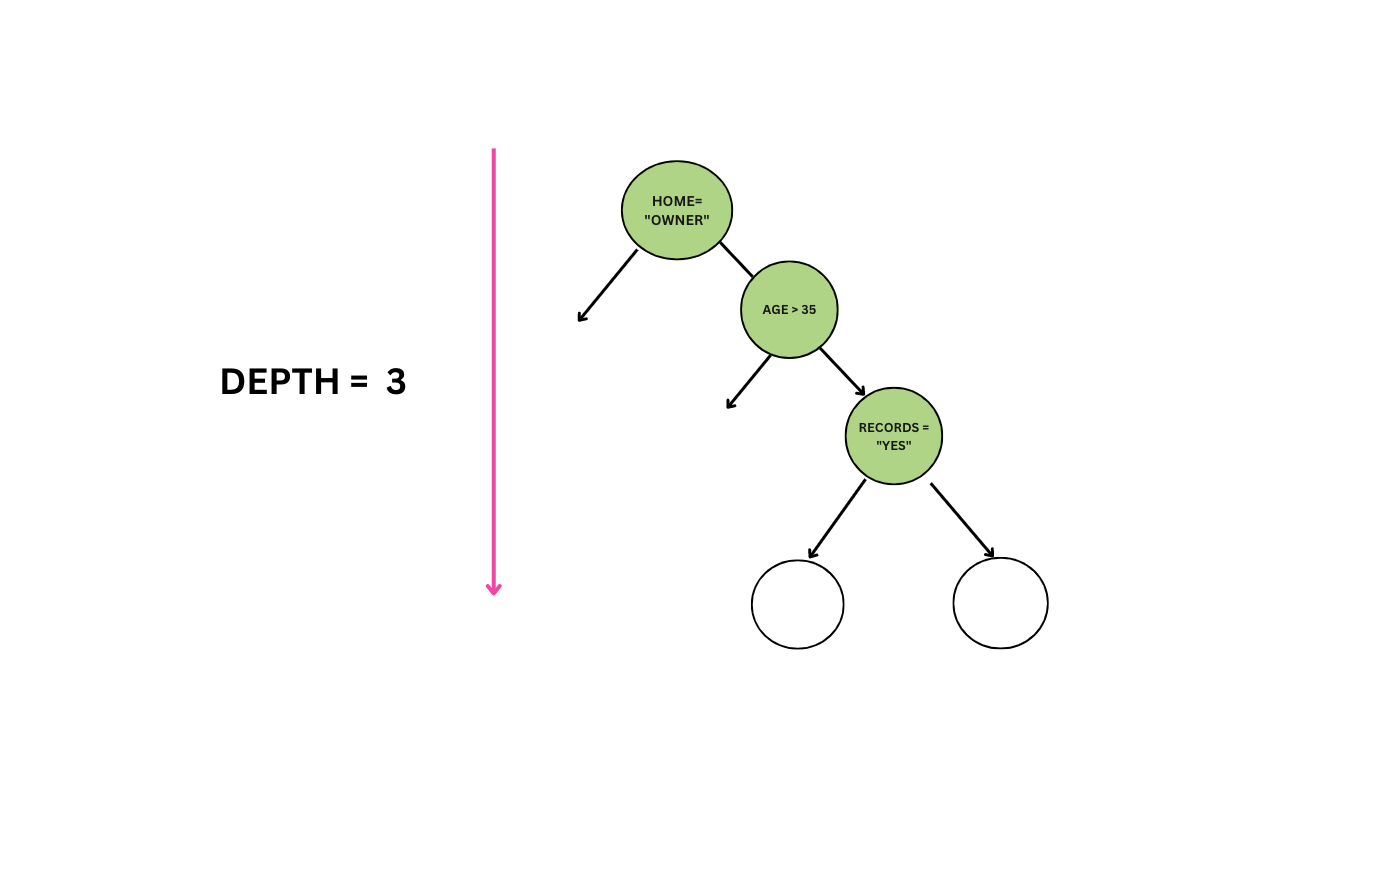

* So let's say if we take a tree like that if we say we only want to have a free that is only three levels deep depth three (depth=3) then it will learn rules that are less specific so maybe here **records "yes"**

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

* Retrain the tree but control the depth of the tree, I'll let it grow only three levels (max_depth = 3) and it will not be able to grow to the fourth level.



In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


In [ ]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.6282660131823559
val: 0.6058644740984719


* When we do that if we restrict the depth of trees to three then now the performance of our model on validation is significantly better so 73 compare to 65 so it's like 80 percent better so and by distinctly not letting the tree grow in definitely many levels we achieve better performance and we can even set the depth to one then the model we have is worse actually than what we have here.


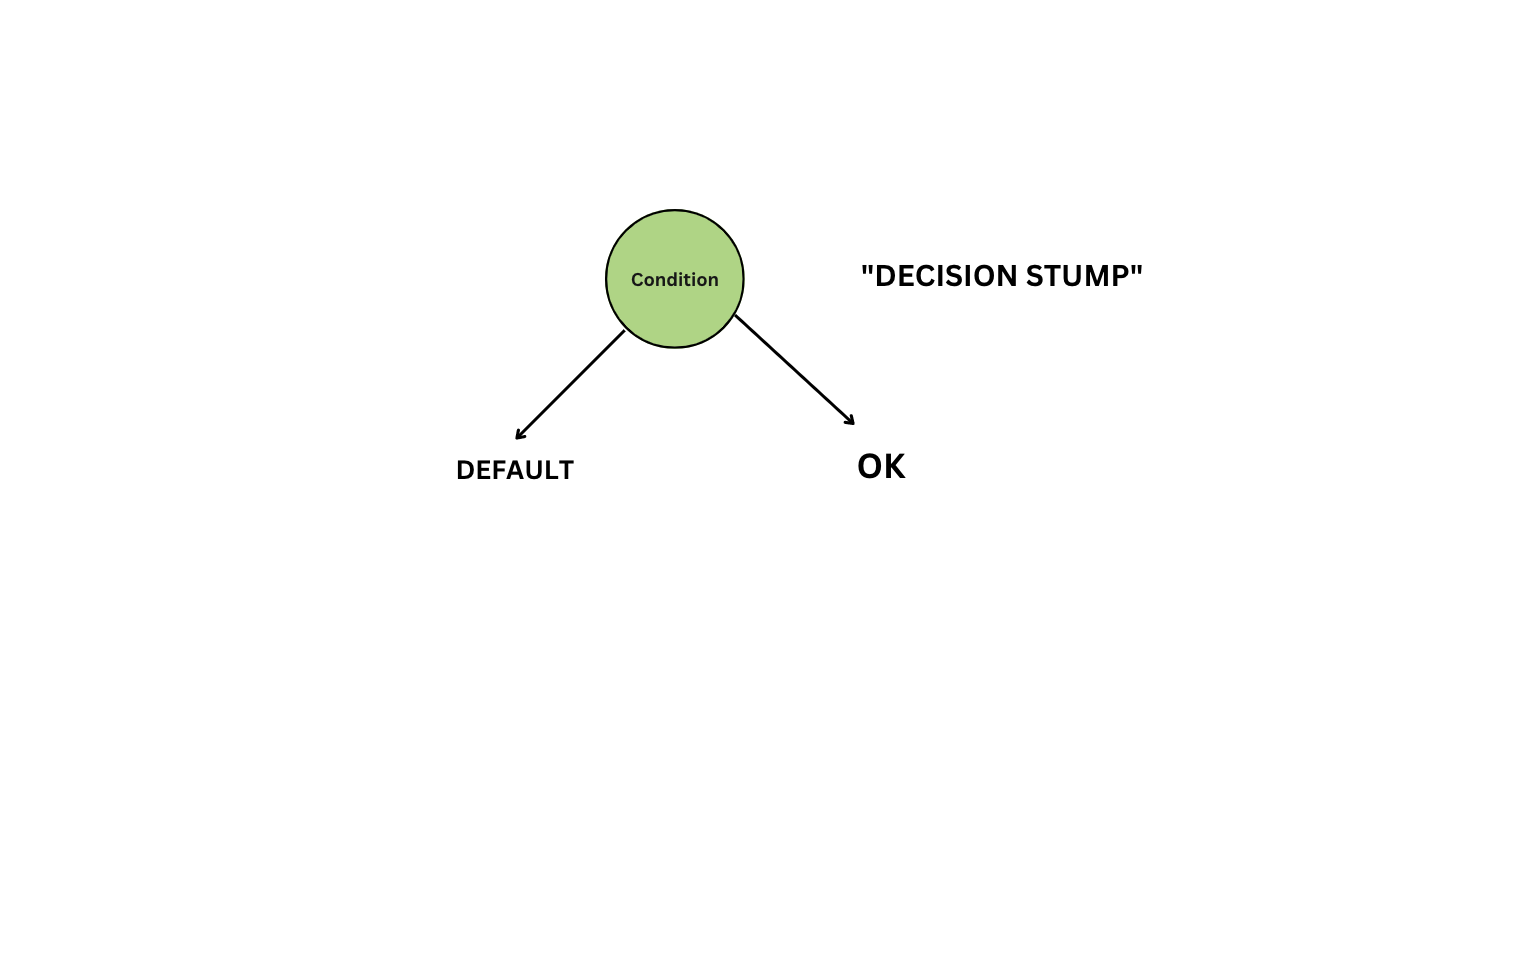

* So if we stick it to depth one so we have a tree that looks like this so there is some condition and then here let's say okay here we say default and here is only one condition and this kind of three is actually called **decision stump** this is like not really a tree only one condition.

In [ ]:
from sklearn.tree import export_text

In [ ]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 1
|--- feature_25 >  0.50
|   |--- class: 0



* If feature 25 is less than 0.5 then we predict default if it's more than 0.5 we predict okay so to know what feature 25 means we need to use our dictionary vectorizer.

In [ ]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- class: 1
|--- records=no >  0.50
|   |--- class: 0



* Then if says there are no records then it's default actually if there are records this is one hot encoding so let's say we have these records with no column and then it can be zero or one, zero it's when it's not any and one is when it's known so here this records equals no more than zero point five means that the records are **no** because we use one hot encoding here this is how we translate.

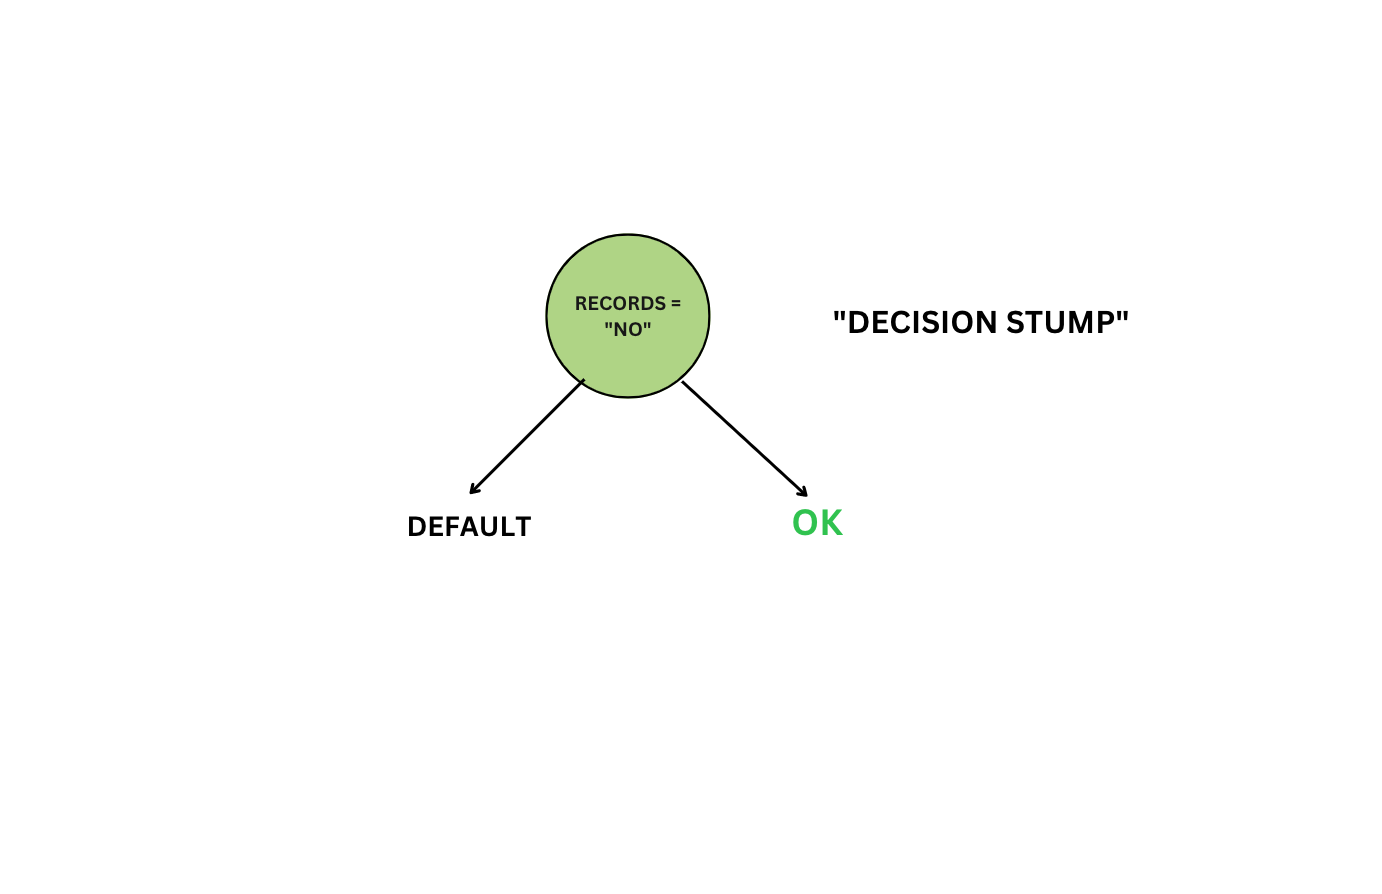


* The decision stump we learned the rule it learned was, so if records are yes, let's see if the **records No**, then the class is zero so it okay and if records are yes then it defaults, so records yes probably means that there are records of this customer not being backend alone. this is what the decision stump that we just trained looks like.
* level two is already better than what we had previously.

That's a case of overfitting - our model on the training data performs perfectly but fails on validation

Let's change the depth parameter: restring the size of the tree to 2 levels:

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


It's even better than the previous tree!

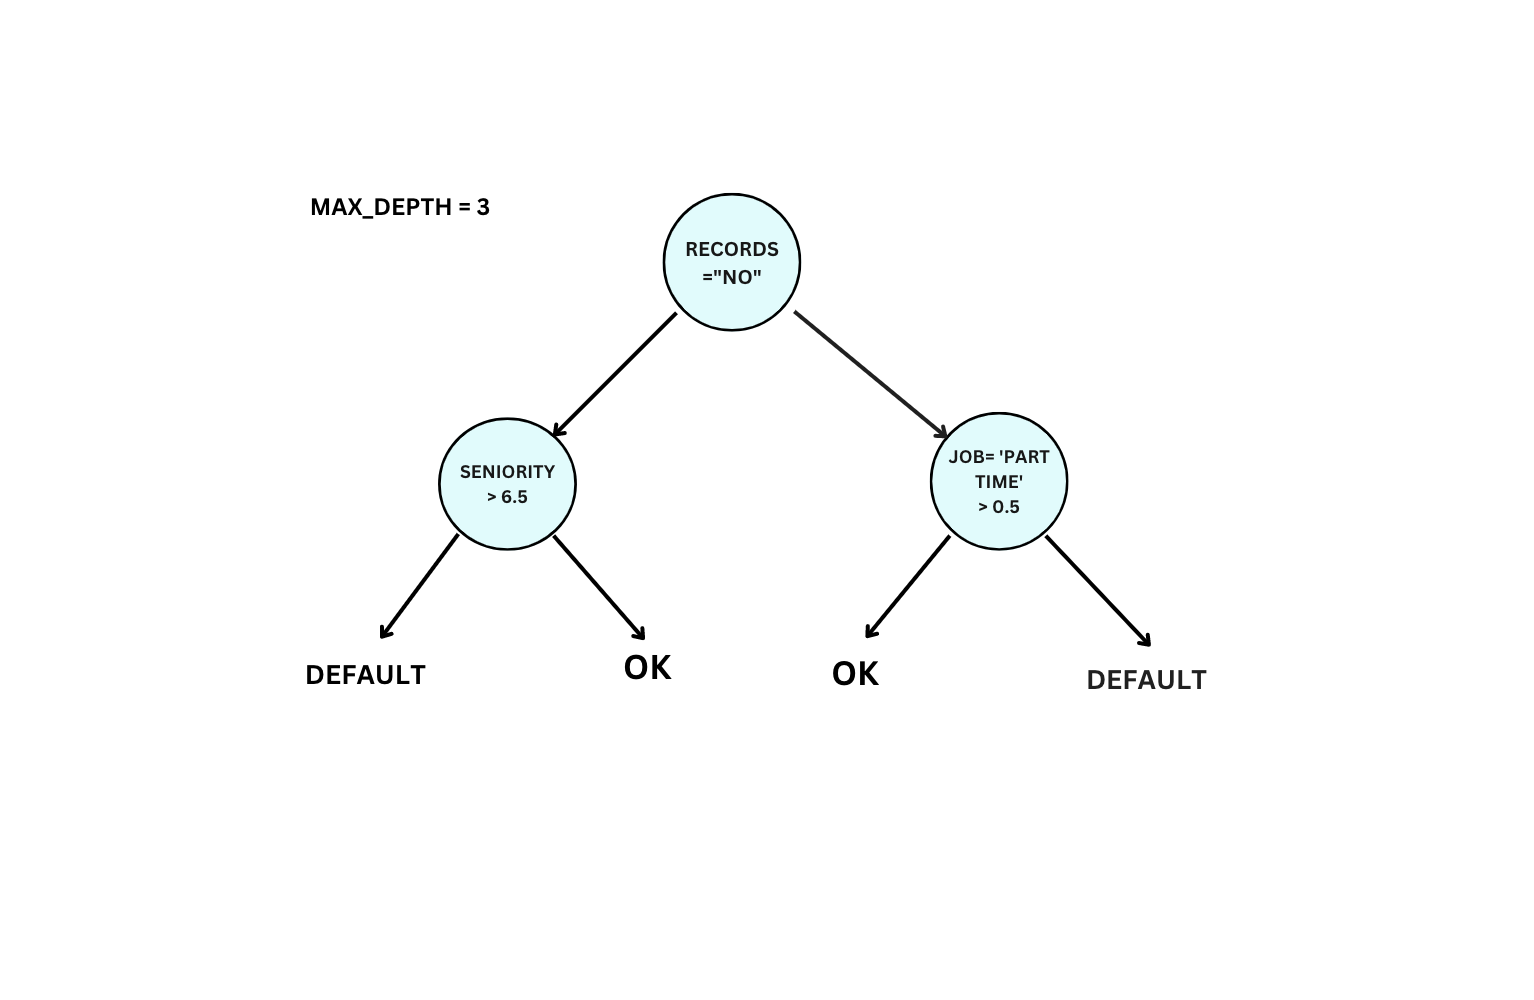

In [ ]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



# **6.4 Decision tree learning algorithm** (video 4)

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

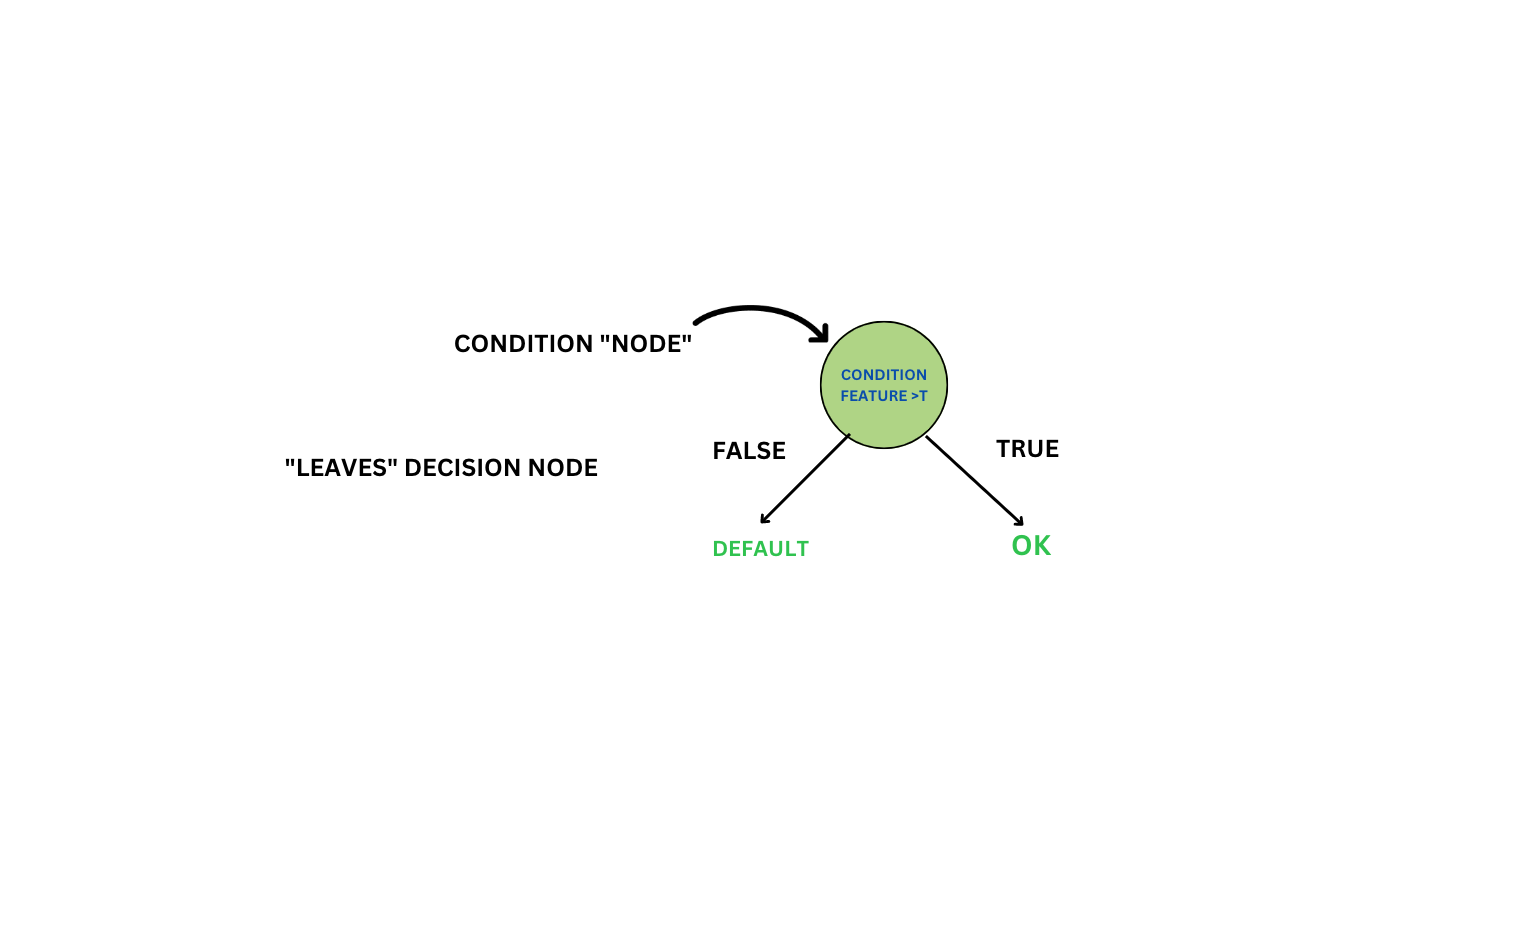


* Node with condition node then inside this node we have here a condition and this condition usually takes a form of this condition is some feature and the it's larger than some threshold **t** so there is a number and can be **ture** it can be **false** if we talk about a simple decision stamp, decision tree with just one level then we arrive at decision nodes so here can be let's say okay on default this is decision node and it's often called **leaf** so these are leaves of the tree so this is where there doesn't go deeper this is where we make a decision to illustrate how the learning algorithm look like how it work let's use code.

In [ ]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0,'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data)
df_example

0        1
0  8000  default
1  2000  default
2     0  default
3  5000       ok
4  5000       ok
5  4000       ok
6  9000       ok
7  3000  default

* We have two columns here the first column is assets and the second column is the status ill call it a dataframe example and let's turn this list into another dataframe now, we need to have proper call names so assets and status.
* We use the numerical column here assets so we want to train our decision using this assets column so what we want to do is here

In [ ]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0,'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

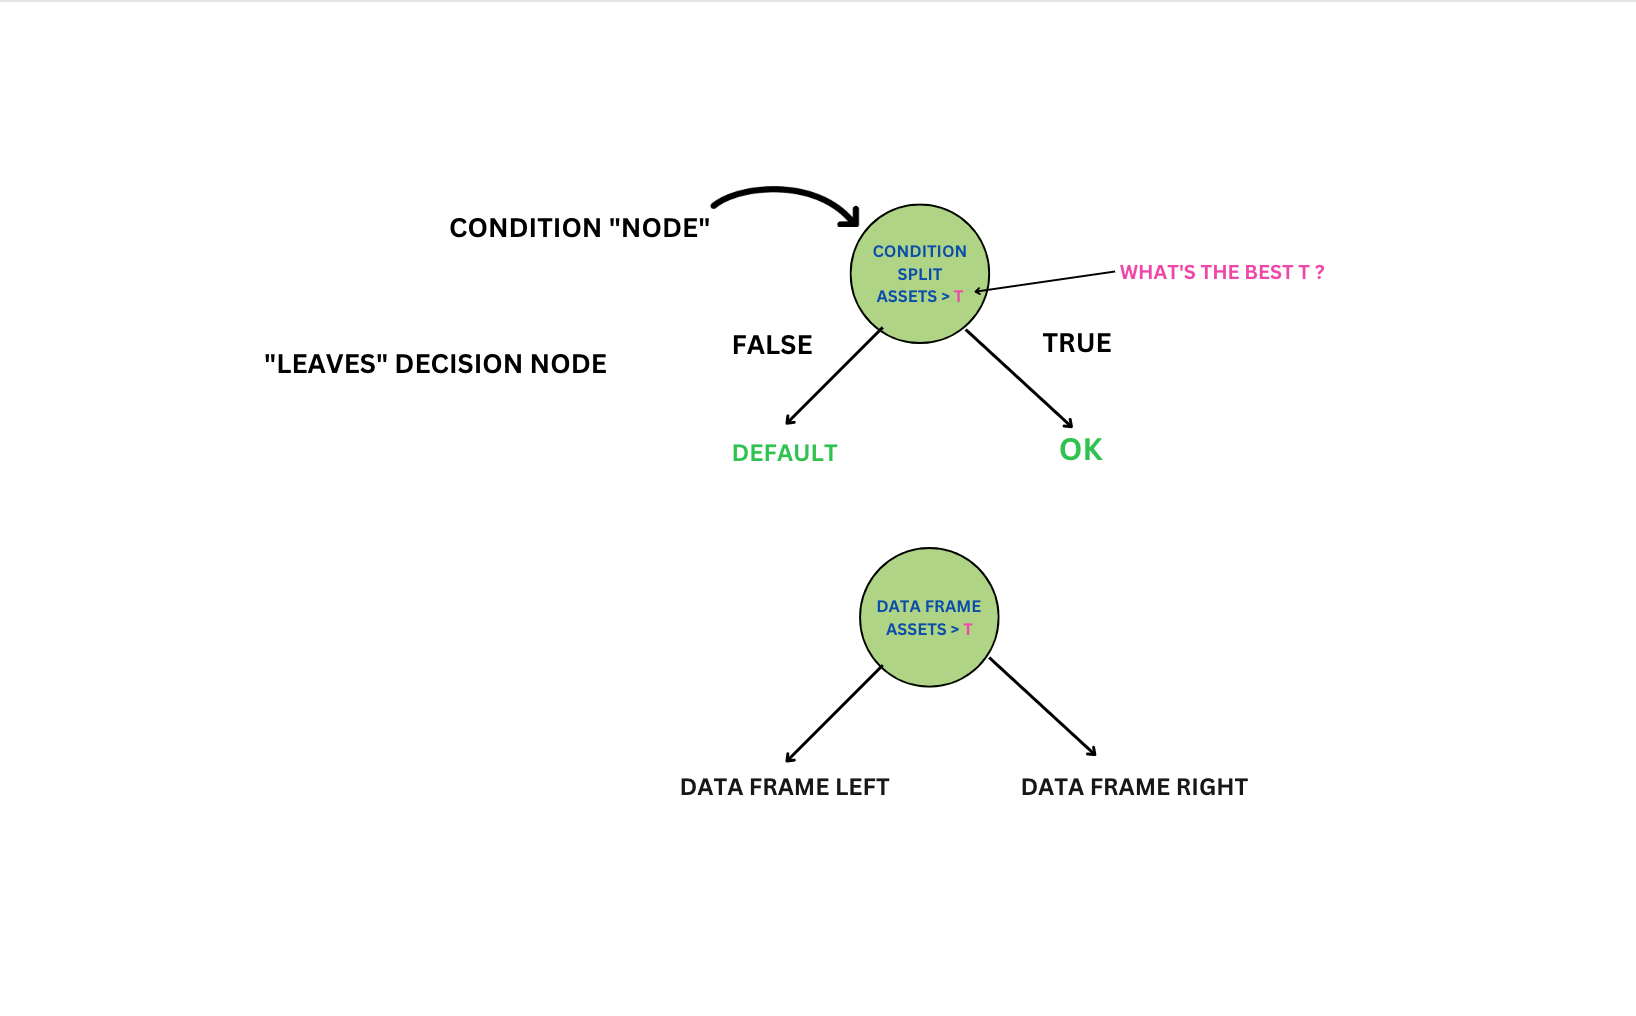

* Condition would be assets greater than some threshold **t** and the question we have here what's the best T? so what is the best split on here so this is called **split**, we want to split the dataset into two parts, if will split it into a dataset where the conditon holds true so let's say we have a decision tree here so we have some dataframe and then we have the split assets greater than t and then what we have is a dataframe it's called **right** this is where this condition is true so all the records for which assets is greater than t and dataframe **left**, here we have **TRUE** and **FALSE**, so this is called **splitting**, we're splitting the dataset into two parts where it's true and where it's false, we put some code now.

In [ ]:
df_example.sort_values('assets')

assets   status
2       0  default
1    2000  default
7    3000  default
5    4000       ok
3    5000       ok
4    5000       ok
0    8000  default
6    9000       ok

* We can sort our data by the assets call just sort values by assets.
* We want to remember that we want to come up with rule assets greater than t so what are the possibilities so there is a threshold we can split our dataset.
* T can be two thousand (T = 2000) and we can split the dataset here and by splitting.

* We just cut it and then it becomes our **LEFT** part is two thousand, three thousand, four thousand and this becomes our **RIGHT** part then we can have a threshold of four thousand if we split here five thousand then eight thousand and nine thousand doesn't make much sense because if we use this asset more than nine thousand there will be nothing on the right so we don't need nine thousand and in the same way, we don't need a threshold of zero because if we have this threshold of zero then on the left there will be nothing so these are potential threshold. we code this.

* We cut it into two parts left and right and see which one is the best.
* Now we have a lot of splits across all these thresholds.

In [ ]:
Ts = [0, 2000,3000,4000,5000,8000]

In [ ]:
from IPython.display import display

In [ ]:
for T in Ts:
  print(T)
  
  df_left  = df_example[df_example.assets <= T]
  df_right = df_example[df_example.assets > T]

  display(df_left)
  display(df_right)

  print()


0


assets   status
2       0  default

assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default


2000


assets   status
1    2000  default
2       0  default

assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default


3000


assets   status
1    2000  default
2       0  default
7    3000  default

assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok


4000


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok


5000


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

assets   status
0    8000  default
6    9000       ok


8000


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

assets status
6    9000     ok

In [ ]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
display(df_right)

assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

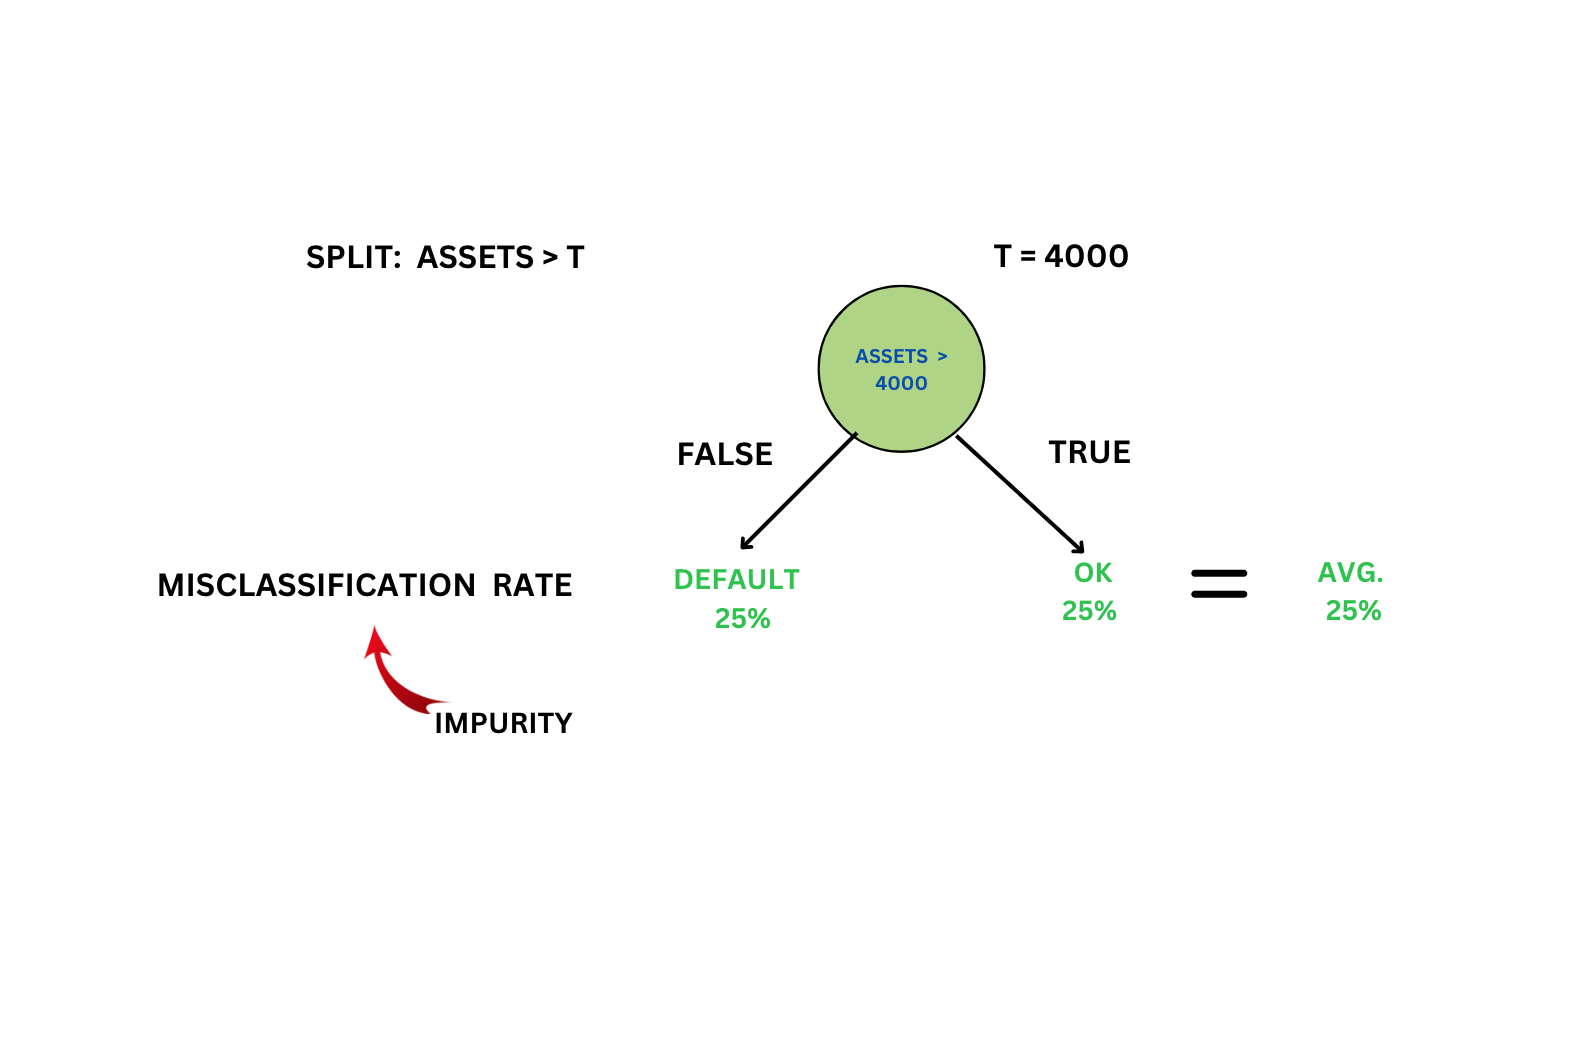

* Split is assets greater than T and we want to find the best one let's think how he could be used so we have the split which is assets split datasets into two parts left and right so if it's true and this is false.
* Majority of the clients have the okay status so prediction is okay.
* Misclassification rate is when we predict everyone as default here how many errors we make and what is the fraction of errors.

In [ ]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts())
display(df_right)
print(df_right.status.value_counts())

assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    3
ok         1
Name: status, dtype: int64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

ok         3
default    1
Name: status, dtype: int64


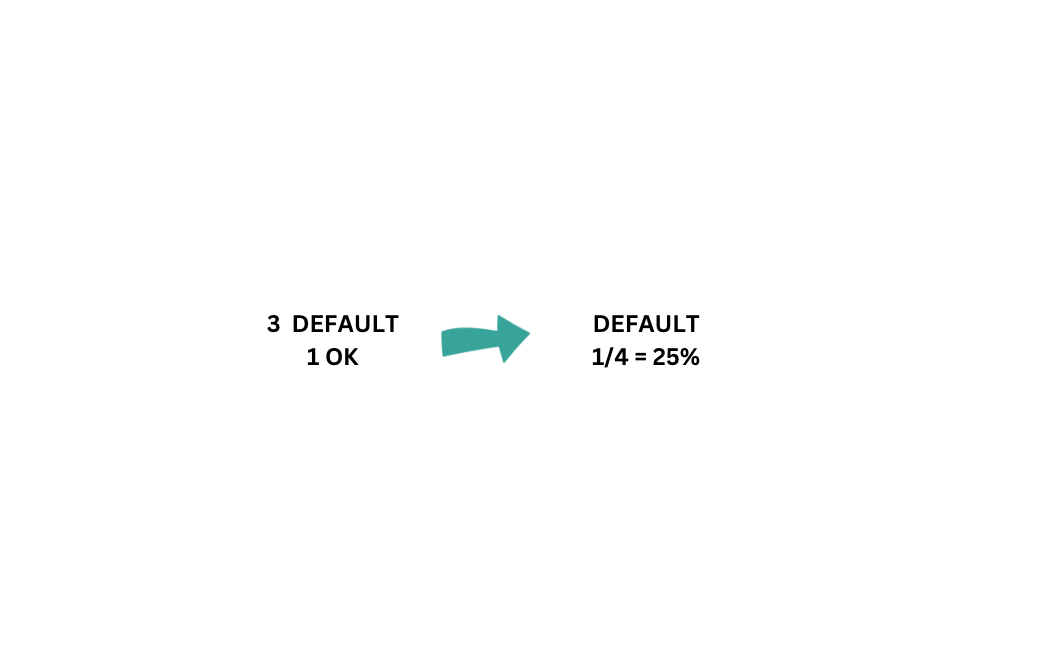

* Three default and one okay so predict everyone as default so if we do these we will make one error out of four so our misclassification rate = 25%

In [ ]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

default    0.75
ok         0.25
Name: status, dtype: float64


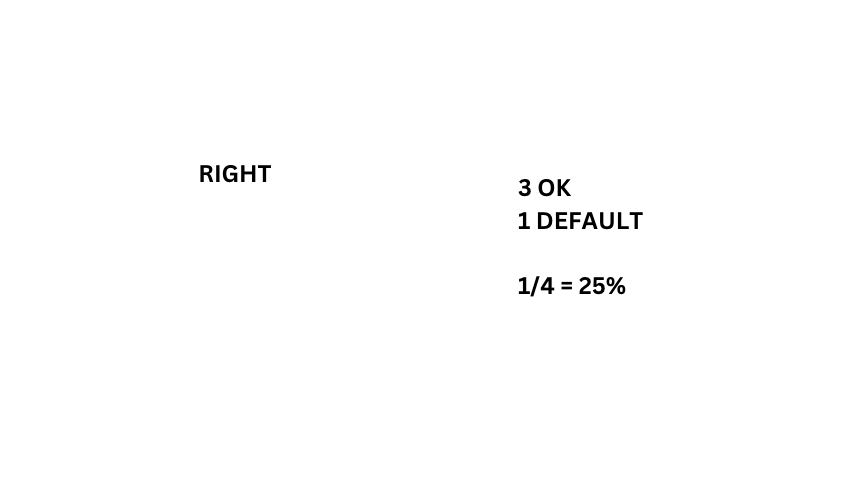

* We have our misclassification rate of 25% for default and 25% for okay, this is how we can evaluate the quality of our split for T equal four thousand when we do this we get a 25 error rate misclassification rate on the left 25 on the right 25.
* Let's take an average here is 25%, we can say okay if we use this T four thousand as the split then the average misclassification rate we get is 25%

* ratios 75% are default it is the majority class here and then it means that for these okay people for those who did not default we make an error, and our error rate misclassification rate is 25%.

In [ ]:
from IPython.display import display

In [ ]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


assets   status
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


assets   status
1    2000  default
2       0  default
7    3000  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

ok         0.8
default    0.2
Name: status, dtype: float64

4000


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

ok         0.75
default    0.25
Name: status, dtype: float64

5000


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.5
ok         0.5
Name: status, dtype: float64


assets   status
0    8000  default
6    9000       ok

default    0.5
ok         0.5
Name: status, dtype: float64

8000


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64


assets status
6    9000     ok

ok    1.0
Name: status, dtype: float64



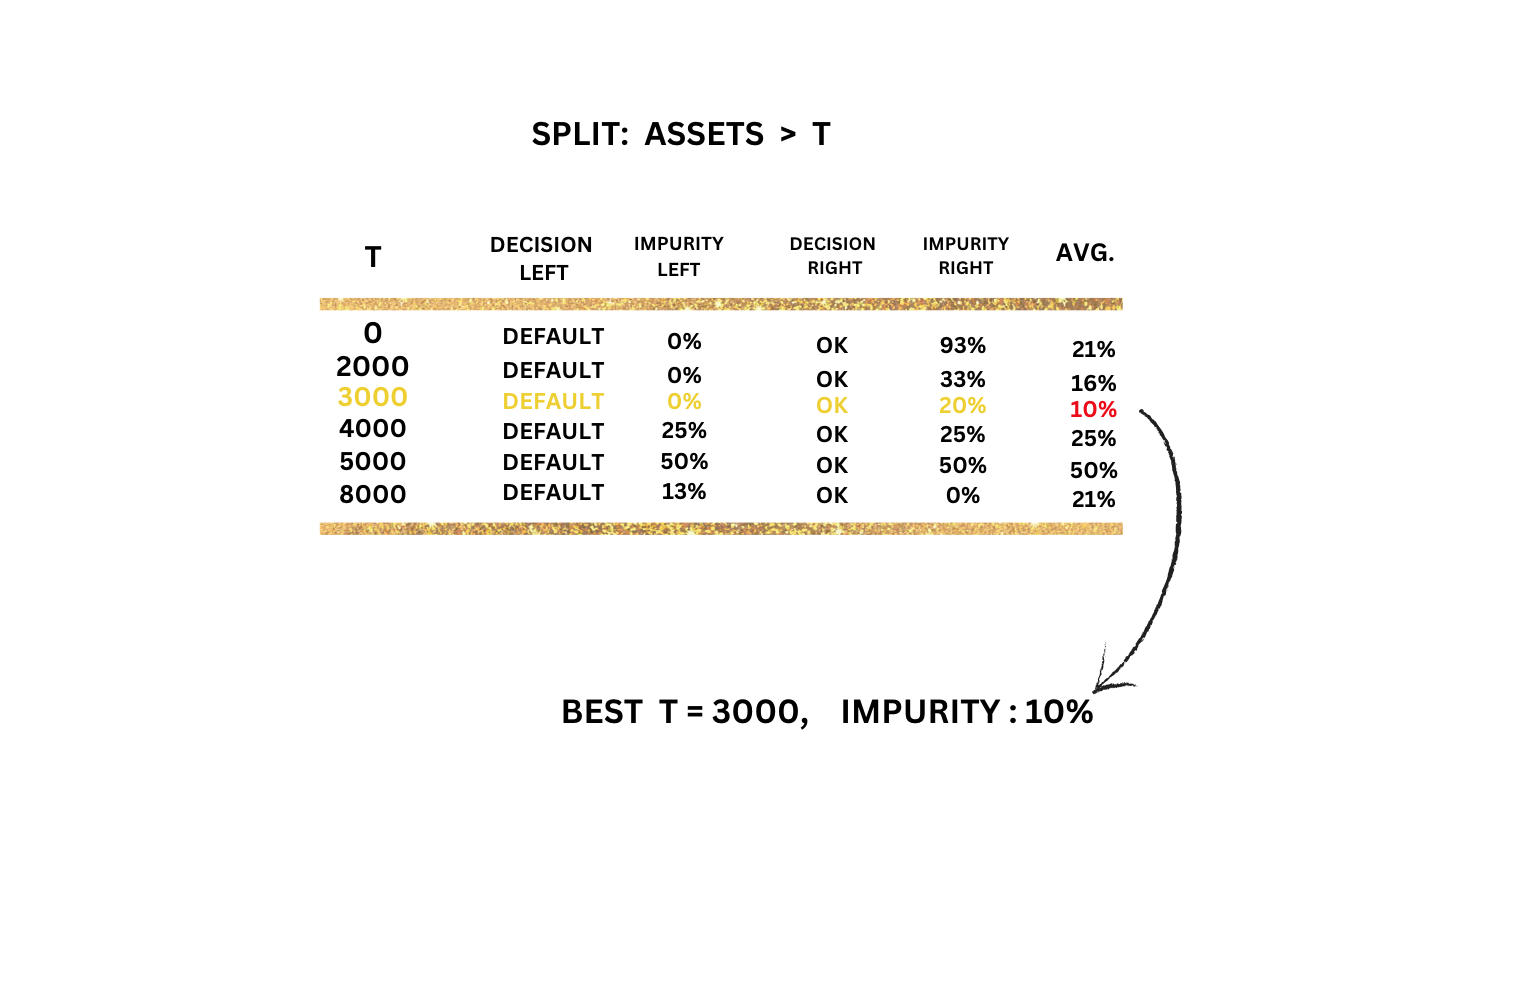

* One way of measuring impurity
* Misclassification rate tells us how impure they are.
* We calculate the impurity from left to right
* We computed the average impurity
* The lowest one and it was three thousand this is the best possible split for this particular dataset.
* Best T = 3000, impurity: 10% this is how we found the best split if we just have one column

In [ ]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

In [ ]:
df_example.sort_values('debt')

assets  debt   status
6    9000   500       ok
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default
0    8000  3000  default

In [ ]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [ ]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


assets  debt   status
2       0  1000  default

default    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
1    2000  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


assets  debt   status
1    2000  1000  default
2       0  1000  default

default    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


assets  debt   status
1    2000  1000  default
2       0  1000  default
7    3000  2000  default

default    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

ok         0.8
default    0.2
Name: status, dtype: float64

4000


assets  debt   status
1    2000  1000  default
2       0  1000  default
5    4000  1000       ok
7    3000  2000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
6    9000   500       ok

ok         0.75
default    0.25
Name: status, dtype: float64

5000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

default    0.5
ok         0.5
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
6    9000   500       ok

default    0.5
ok         0.5
Name: status, dtype: float64

8000


assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64


assets  debt status
6    9000   500     ok

ok    1.0
Name: status, dtype: float64

#####################
#####################
debt
500


assets  debt status
6    9000   500     ok

ok    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

ok         0.666667
default    0.333333
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default
7    3000  2000  default

default    1.0
Name: status, dtype: float64

2000


assets  debt   status
1    2000  1000  default
2       0  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64


assets  debt   status
0    8000  3000  default

default    1.0
Name: status, dtype: float64

#####################


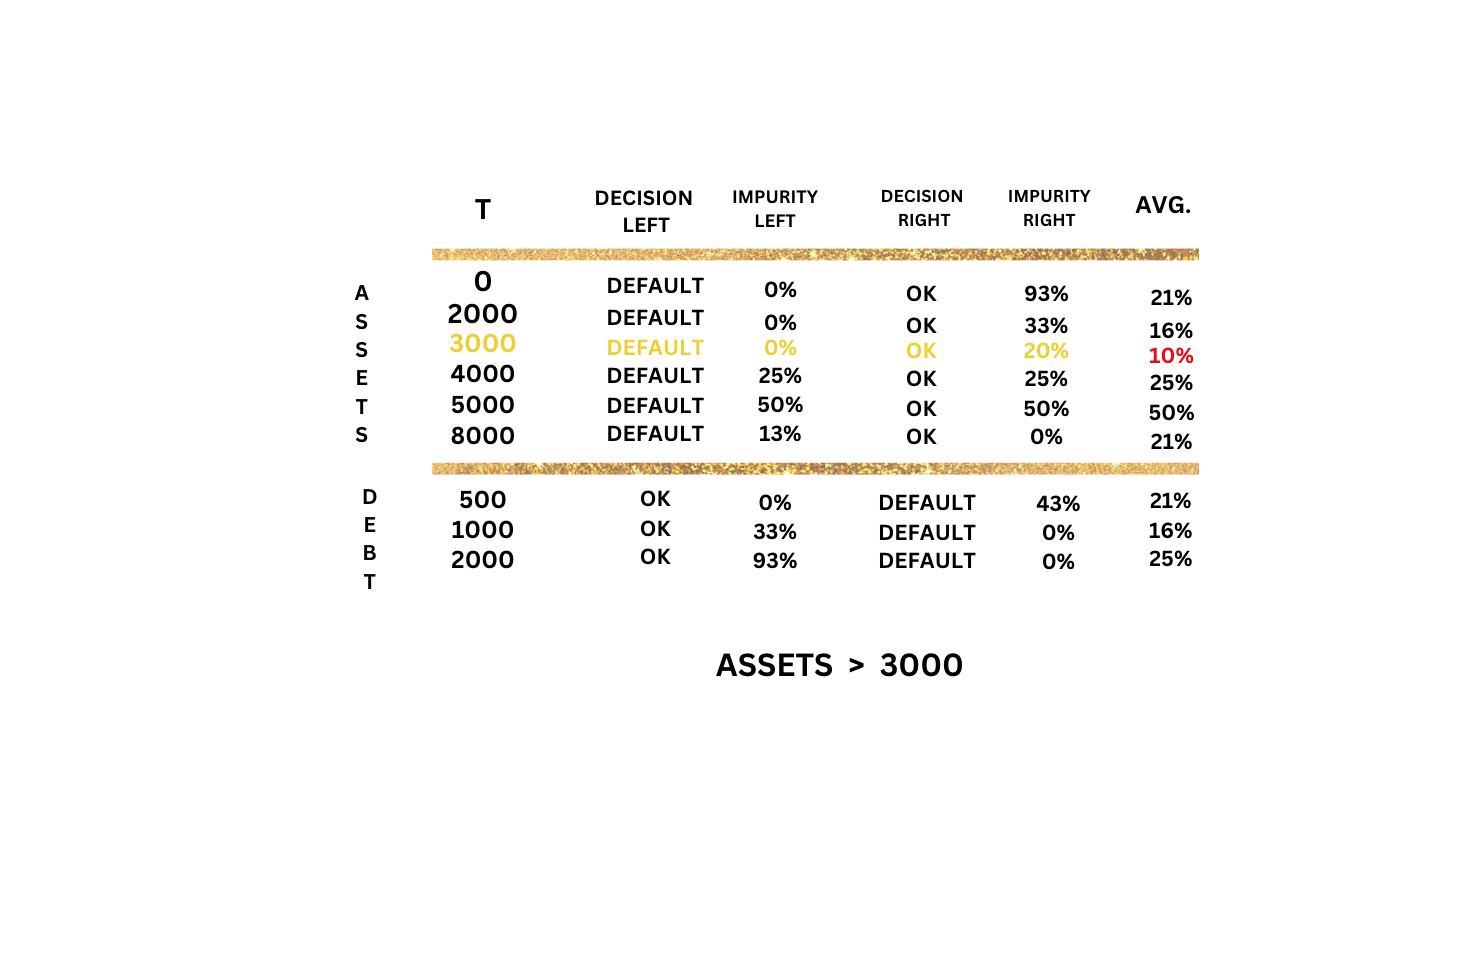

* Let's write this down finding the best split algorithm for all the features we have our example had two features.
* For each feature we find the threshold
* Trees have multiple parameters.

## **FINDING THE BEST SPLIT ALGORITHM:**

    FOR F IN FEATURES:
      FIND ALL THRESHOLDS FOR F
      FOR T IN THRESHOLDS: 
      SPLIT DATASET USING "F > T" CONDITION COMPUTE THE IMPURITY OF THIS SPLIT
  
    SELECT THE CONDITION WITH THE LOWEST IMPURITY



## **STOPPING CRITERIA**

* GROUP ALREADY PURE
* TREE REACHED DEPTH LIMIT
* GROUP TOO SMALL TO SPLIT

# **DECISION TREE LEARNING ALGORITHM**

* FIND THE BEST SPLIT
* STOP IF MAX_DEPTH IS REACHED
* IF LEFT IS SUFFICIENTLY LARGE AND NOT PURE:
  REPEAT FOR LEFT
* IF RIGHT IS SUFFICIENTLY LARGE AND NOT PURE:
  REPEAT FOR RIGHT


# **6.5 Decision trees parameters tuning** (video 5)

* selecting max_depth
* selecting min_samples_leaf

Notes
___
In this lesson, we will discuss about different parameters present to control a Decision Tree (DT). Two features, max_depth, and min_samples_leaf have grethe ater importance than other parameters. We will further see how we first tune max_depth parameter and then move to tune other parameters will help. Finally, a dataframe is created with all possible combinations of max_depth, min_sample_leaf, and the AUC score corresponding to them. These results are visualized using a heatmap by pivoting the dataframe to easily determine the best possible max_depth and min_samples_leaf combination. Finally, the DT is retrained using the identified parameter combination. DT so trained is viewed as a tree diagram.

* Tree has multiple parameters first the max depth parameter which tells us how deep the tree can grow like how many layers this three-way can have and then the second parameter was that how would it decide if a leaf is sufficiently large if a group is sufficiently large, so this another parameter that controls the minimum size of a group there are more parameters in decision trees but these two are probably the most important ones and we can now tune them.

* We want to find a parameter such that AUC is maximum and validation is maximized


In [ ]:
DecisionTreeClassifier() 

(*, 
* criterion: str = "gini", 
* splitter: str = "best", 
* max_depth: Any | None = None, 
* min_samples_split: int = 2, 
* min_samples_leaf: int = 1, 
* min_weight_fraction_leaf: float = 0, 
* max_features: Any | None = None, 
* random_state: Any | None = None, 
* max_leaf_nodes: Any | None = None, 
* min_impurity_decrease: float = 0, 
* class_weight: Any | None = None, 
* ccp_alpha: float = 0) -> None

* There are of quite a few parameters like criterion this is the impurity measure, gini there's antropy all these parameters we will leave them as is what we are interested in is the max_depth parameter which control the size of the tree and then min_simple_leaf size which controls the size of a leaf and leaf is the node the decision node when we actually make a decision when we say if the prediction for the client is going to be default or not so this is the decision leave and how many samples or observations we want to have in each leaf so basically the size of a group these two are the most important and the rest you can go through the documentation and see what kind of parameters are there.

In [ ]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.757
  10 -> 0.689
  15 -> 0.666
  20 -> 0.658
None -> 0.662


* The best value is 76% of our depth from four to six layers
* Best depth values on 4, 5, 6

In [ ]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200,500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('(%4s, %3d) -> %.3f' % (d,s, auc))

(   4,   1) -> 0.663
(   4,   2) -> 0.703
(   4,   5) -> 0.722
(   4,  10) -> 0.759
(   4,  15) -> 0.787
(   4,  20) -> 0.781
(   4, 100) -> 0.780
(   4, 200) -> 0.768
(   4, 500) -> 0.680
(   5,   1) -> 0.644
(   5,   2) -> 0.697
(   5,   5) -> 0.719
(   5,  10) -> 0.762
(   5,  15) -> 0.786
(   5,  20) -> 0.781
(   5, 100) -> 0.779
(   5, 200) -> 0.768
(   5, 500) -> 0.680
(   6,   1) -> 0.646
(   6,   2) -> 0.702
(   6,   5) -> 0.718
(   6,  10) -> 0.758
(   6,  15) -> 0.786
(   6,  20) -> 0.781
(   6, 100) -> 0.779
(   6, 200) -> 0.768
(   6, 500) -> 0.680


In [ ]:
scores = []

for d in [4, 5, 6]:
    for s in [1,2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0          4                 1  0.761283
1          4                 2  0.761283
2          4                 5  0.761283
3          4                10  0.761283
4          4                15  0.763726

In [ ]:
df_scores.sort_values(by='auc', ascending=False).head()

max_depth  min_samples_leaf       auc
22          6                15  0.785471
21          6                10  0.777803
24          6               100  0.776434
14          5                20  0.773537
23          6                20  0.773337

In [ ]:
df_scores

max_depth  min_samples_leaf       auc
0           4                 1  0.761283
1           4                 2  0.761283
2           4                 5  0.761283
3           4                10  0.761283
4           4                15  0.763726
5           4                20  0.760910
6           4               100  0.755937
7           4               200  0.747260
8           4               500  0.679842
9           5                 1  0.766938
10          5                 2  0.766938
11          5                 5  0.767755
12          5                10  0.762276
13          5                15  0.772142
14          5                20  0.773537
15          5               100  0.763384
16          5               200  0.759073
17          5               500  0.679842
18          6                 1  0.758313
19          6                 2  0.762648
20          6                 5  0.759321
21          6                10  0.777803
22          6                15  0.785471
23          6                20  0.773337
24          6               100  0.776434
25          6               200  0.768267
26          6               500  0.679842

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.758
2                 0.761  0.767  0.763
5                 0.761  0.768  0.759
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

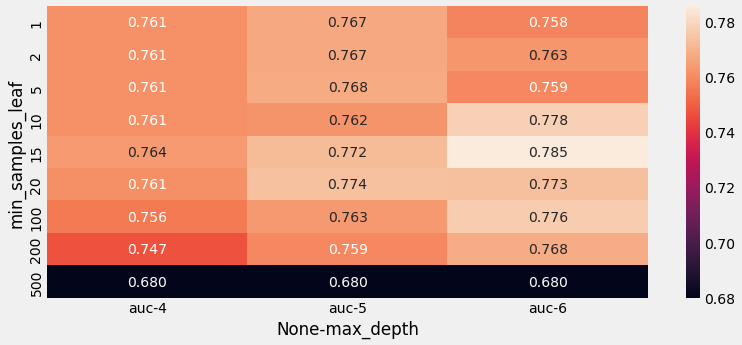

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


* It is easier to find the highest value, the lightest color the most, and then the darkest is the worst one.
* Cell means of all leaves is 15 and we know it's ac-6 this is max_depth six.
* selecting the best parameter could be sub-optimal.
* First tune the max depth parameter and then I tune the min_sample leaf parameter

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

EXPERIMENT: let's try other values

In [ ]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0        4.0                 1  0.761283
1        4.0                 2  0.761283
2        4.0                 5  0.761283
3        4.0                10  0.761283
4        4.0                15  0.763726

In [ ]:
df_scores.sort_values(by='auc', ascending=False).head()

max_depth  min_samples_leaf       auc
40       10.0                15  0.790651
58       20.0                15  0.787796
67        NaN                15  0.787587
49       15.0                15  0.787042
22        6.0                15  0.785319

In [ ]:
df_scores

max_depth  min_samples_leaf       auc
0         4.0                 1  0.761283
1         4.0                 2  0.761283
2         4.0                 5  0.761283
3         4.0                10  0.761283
4         4.0                15  0.763726
..        ...               ...       ...
67        NaN                15  0.787587
68        NaN                20  0.784396
69        NaN               100  0.779474
70        NaN               200  0.768479
71        NaN               500  0.679842

[72 rows x 3 columns]

In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.661  0.761  0.767  0.746  0.737  0.692  0.656  0.648
2                 0.691  0.761  0.767  0.751  0.756  0.722  0.686  0.695
5                 0.716  0.761  0.768  0.760  0.757  0.722  0.716  0.717
10                0.762  0.761  0.762  0.778  0.765  0.766  0.764  0.760
15                0.788  0.764  0.772  0.785  0.779  0.791  0.787  0.788
20                0.784  0.761  0.774  0.774  0.779  0.784  0.782  0.784
100               0.779  0.756  0.763  0.776  0.780  0.779  0.779  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

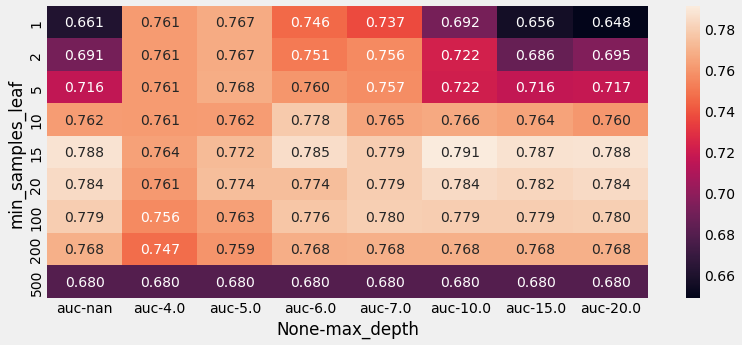

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [ ]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf= 15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# **6.6 Ensembles and Random forest** (video 6)

* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest


## Notes
___
Random Forest is an example of ensemble learning where each model is a decision tree and their predictions are aggregated to identify the most popular result. Random forest only select a random subset of features from the original data to make predictions.

In random forest the decision trees are trained independent to each other.

* from sklearn. ensemble import RandomForestClassifier: random forest classifier from sklearn ensemble class.
* plt. plot(x, y): draw a line plot for the values of y against x values.


* max_depth = 5, max_depth =15, max_depth = 10 is the best one first 10 and 15 they're relatively close but so for 15 it kind of stops growing it grows by a little bit, and for 10 it's doing a lot better this is probably the best one and the after that it kind of stagnates its around 125. what we see here is that depth matters so we need to set a good value for that value of 10 seems to be the best one because the difference between 10 and 15 is at least one percent and the difference between 10 and 5 is like 2.5 which is I would say quite significant for this dataset the value of max_depth = 10 it seems to be the best one.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
  

In [ ]:
roc_auc_score(y_val, y_pred)

0.7921792884647987

In [ ]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

Try any other values

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [ ]:
roc_auc_score(y_val, y_pred)

0.7863396381778112

In [ ]:
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

* We will get different results every time because there is randomization here so every three gets random sub several features, we can fix a random state and set it to one.

In [ ]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))


In [ ]:
pd.DataFrame(scores)

0         1
0    10  0.774473
1    20  0.803532
2    30  0.815075
3    40  0.815686
4    50  0.817082
5    60  0.816458
6    70  0.817321
7    80  0.816307
8    90  0.816824
9   100  0.817599
10  110  0.817527
11  120  0.817939
12  130  0.818253
13  140  0.818102
14  150  0.817270
15  160  0.817981
16  170  0.817606
17  180  0.817463
18  190  0.817981
19  200  0.819050

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [ ]:
df_scores

n_estimators       auc
0             10  0.774473
1             20  0.803532
2             30  0.815075
3             40  0.815686
4             50  0.817082
5             60  0.816458
6             70  0.817321
7             80  0.816307
8             90  0.816824
9            100  0.817599
10           110  0.817527
11           120  0.817939
12           130  0.818253
13           140  0.818102
14           150  0.817270
15           160  0.817981
16           170  0.817606
17           180  0.817463
18           190  0.817981
19           200  0.819050

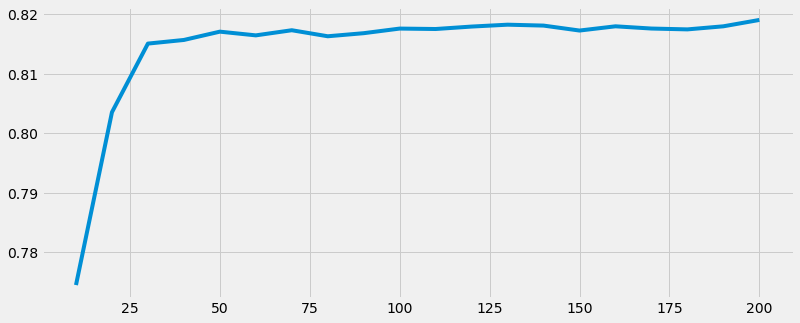

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [ ]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

max_depth  n_estimators       auc
0          5            10  0.787699
1          5            20  0.797731
2          5            30  0.800305
3          5            40  0.799708
4          5            50  0.799878

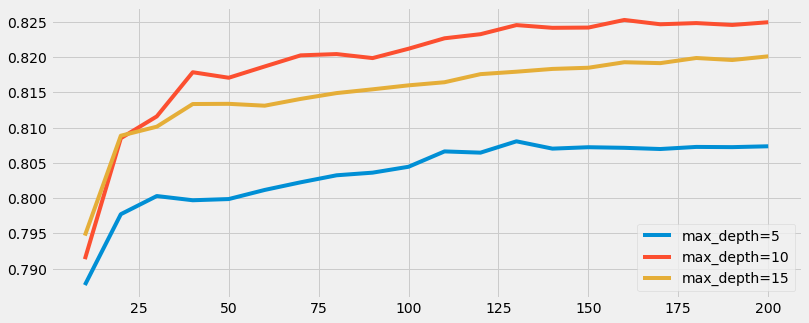

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()


* max_depth = 5, max_depth = 15, max_depth = 10 is the best one first 10 and 15 they're relatively close but so for 15 if it kind of stops growing its ing by a little bit, and for 10 it's doing a lot better, this is probably the best one and the after that if kind of stagnates it's around 125. what we see here is that depth matters so we need to set a good value for that value of 10 seems to be the best one because the difference between 10 and 15 is at least one percent and the difference between 10 and 5 is like 2.5 which is I would say quite significant for this dataset the value of max depth = 10 it seems to be the best one.

In [ ]:
max_depth = 10

In [ ]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

min_samples_leaf  n_estimators       auc
0                 1            10  0.791365
1                 1            20  0.808496
2                 1            30  0.811584
3                 1            40  0.817839
4                 1            50  0.817058

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values,colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

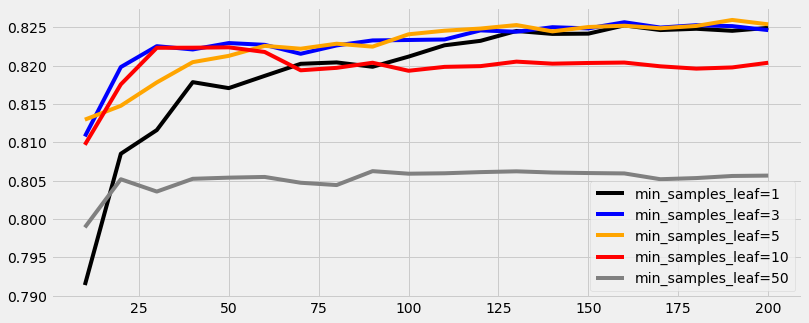

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
min_samples_leaf = 3

In [ ]:
rf = RandomForestClassifier(n_estimators=n,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:

* max_features
* bootstrap

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# **6.7 Gradient boosting and XGBoost** (video 7)

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output


## Notes
___
Unlike Random Forest where each decision tree trains independently, in the Gradient Boosting Trees, the models are combined sequentially where each model takes the prediction errors made my the previous model and then tries to improve the prediction. This process continues to n number of iterations and in the end all the predictions get combined to make final prediction.

XGBoost is one of the libraries which implements the gradient boosting technique. To make use of the library, we need to install with pip install xgboost. To train and evaluate the model, we need to wrap our train and validation data into a special data structure from XGBoost which is called DMatrix. This data structure is optimized to train xgboost models faster.

Classes, functions, and methods:

* xgb.train(): method to train xgboost model.
* xgb_params: key-value pairs of hyperparameters to train xgboost model.
* watchlist: list to store training and validation accuracy to evaluate the performance of the model after each training iteration. The list takes tuple of train and validation set from DMatrix wrapper, for example, watchlist = [(dtrain, 'train'), (dval, 'val')].
* %%capture output: IPython magic command which captures the standard output and standard error of a cell.


## Installing XGBoost on Mac
___
Some students reported problems with installing XGBoost on Mac.

When you run pip install xgboost and when you try to import xgboost in a script you might get an warning or error stating that libomp has not been installed and to run brew install libomp in the terminal.

Be careful: this will install a version of libomp that does not work with xgboost!

This shows in one of two ways after attempting to run xgb.DMatrix(X_train, label=y_train, feature_names=features):

* python script: Segmentation fault: 11
* jupyter notebook: Never finished running, and notebook is unresponsive until kernal restart. However confusingly it sometimes works


## Conda
If you use anaconda or miniconda, try installing xgboost with conda.

First, uninstall xgboost with pip (if you already installed it previously with pip):

In [ ]:
pip uninstall xgboost

Then re-install it with conda:

In [ ]:
Then re-install it with conda:

It will also install the required version of libomp.

## Without conda

If you don't use conda, you can manually install a different version of libopm that works well with XGBoost.

The versions of libomp with this problem are 12. x.x and 13. x.x, however, the issue has a workaround xgboost issue #7039 installing the older libomp 11 using the terminal. In the terminal run brew list --version libomp, to determine the current version of libomp if any. Then if you have a problematic version run brew unlink libomp.

To install the old version of libomp run:

In [ ]:
brew update
wget https://raw.githubusercontent.com/chenrui333/homebrew-core/0094d1513ce9e2e85e07443b8b5930ad298aad91/Formula/libomp.rb
brew install --build-from-source ./libomp.rb

and then run

In [ ]:
brew list --version libomp

to check that everything worked, it should now state libomp 11.1.0, and your code should now be able to run.



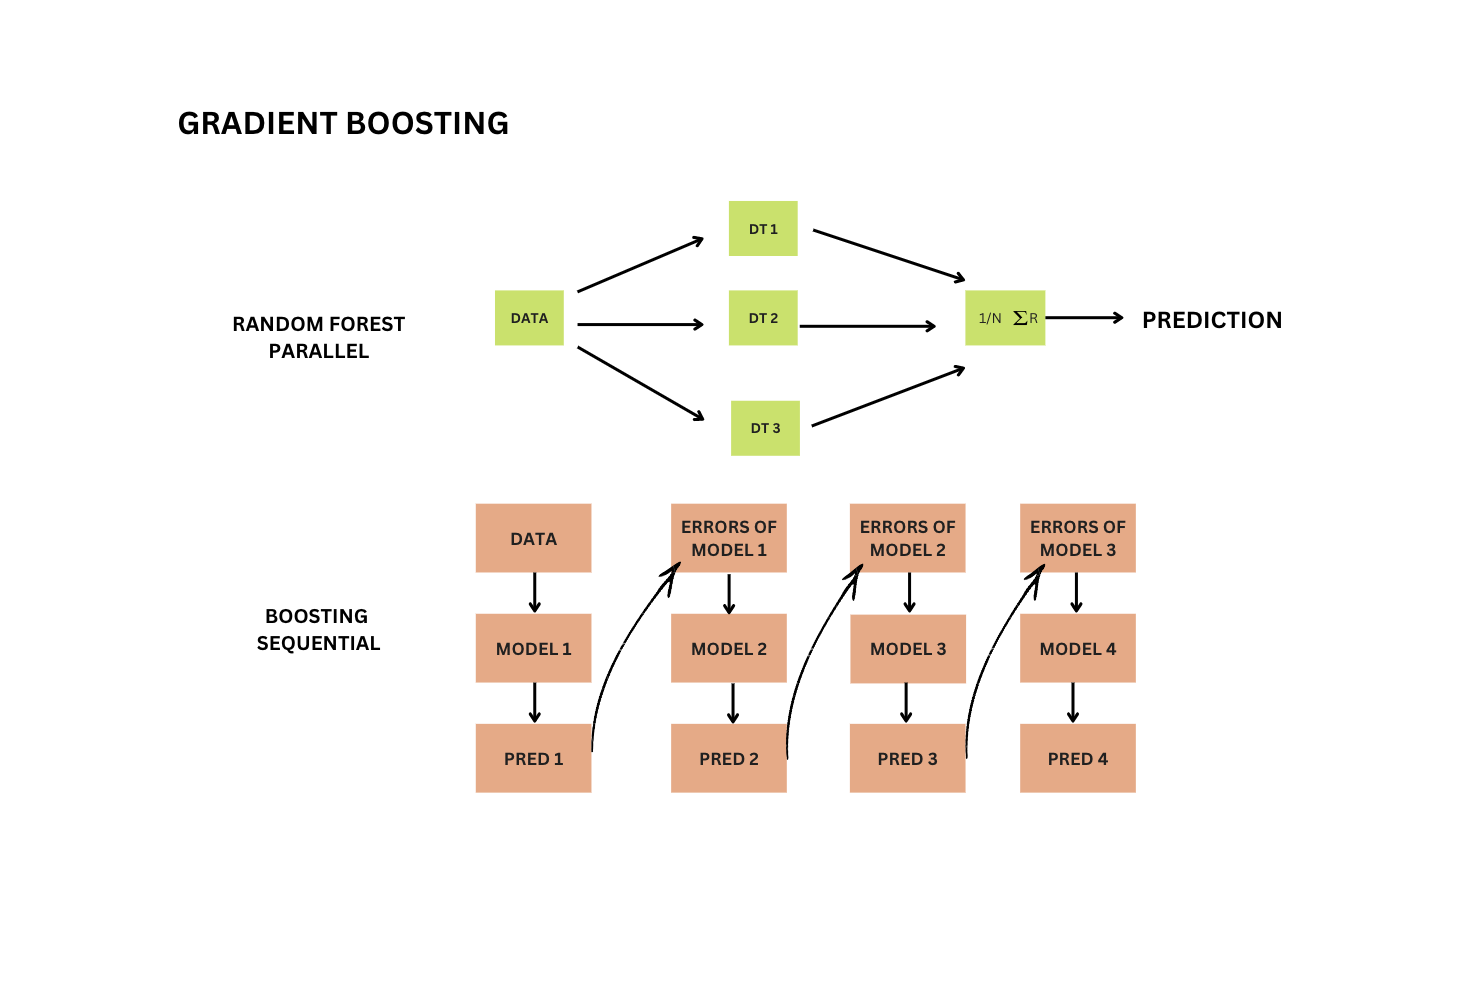

* Combining multiple decision tree models into one ensemble.
* In the random forest you take a dataset and then you train multiple independent decision trees on this dataset and then you combine the result into one single prediction by taking out an average, for example, this is the final prediction.
* For random forests we train multiple independently each tree is independent completely independent from the other but there is a different way of combining multiple models into an ensemble which is called boosting.
* Boosting we start first with a dataset and we train the first model makes predictions then we look at these prediction and look what are the errors that this model is making then we get the errors of model one and base on these errors we train another model and then this other model makes prediction again and this model also make same error and what we do is we train a third model.
* We do this for many iterations and then at the end what we do, we combine multiple predictions into the final predictions. In this idea behind boosting we sequentially train multiple models and each next model correct the mistakes of the previous correct he multiple model 3 corrects, the model 4 corrects the mistakes of model 3 model 2
* The process is sequential, we always train model 1 model 2 and model 3, and so on,
* Unlike in random forest when we train all these different models **DT1, DT2, DT3** in parallel final prediction if we take this model and we replace these models with trees.

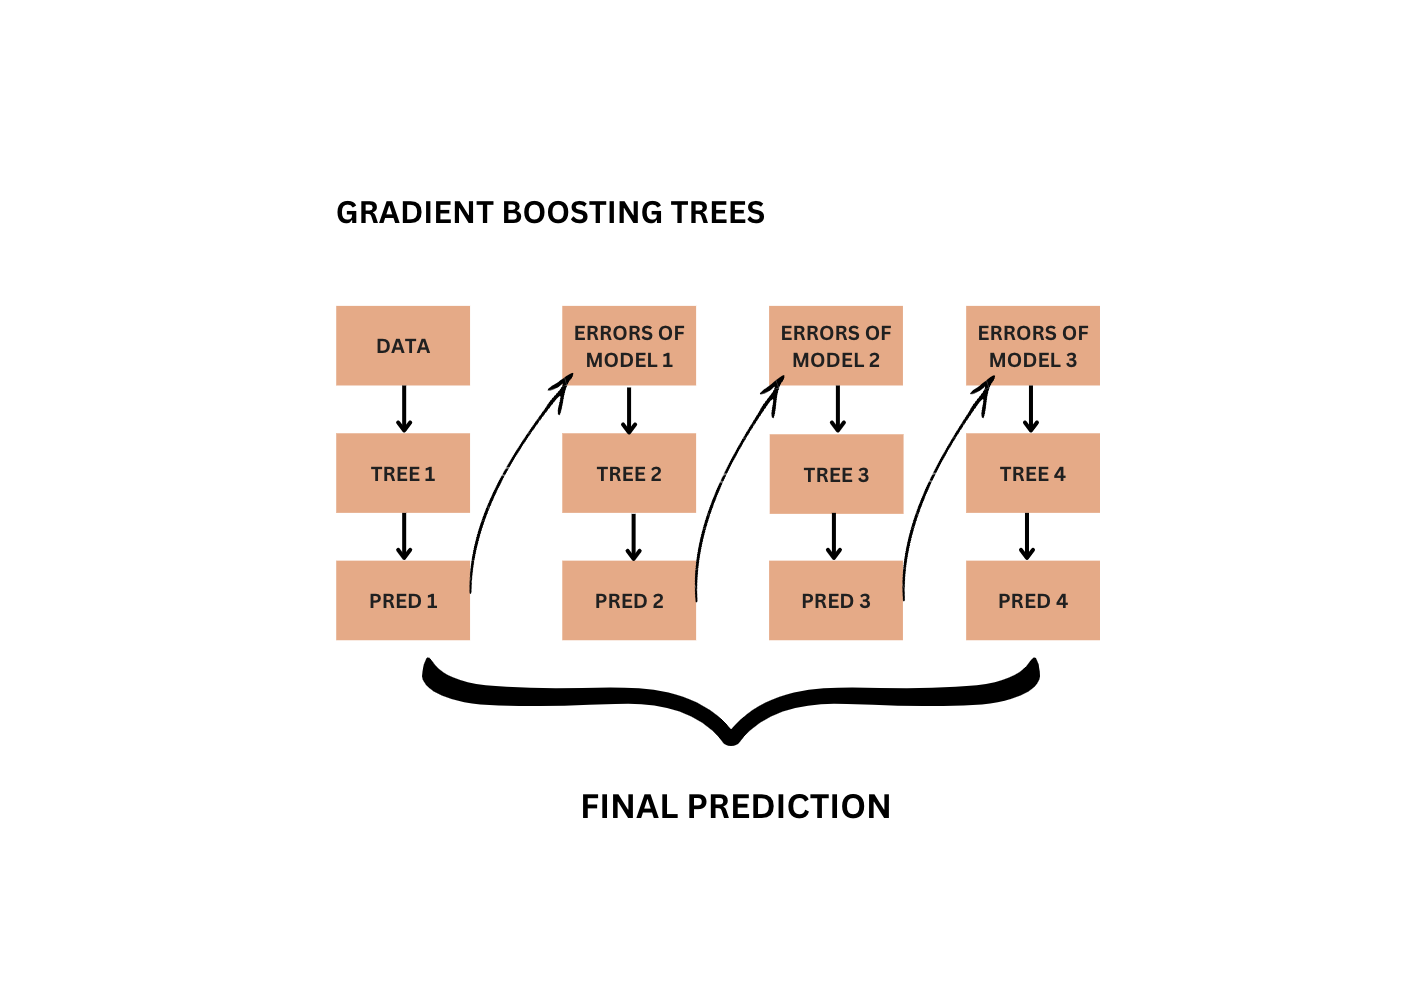

* We get gradient-boosted trees or gradient-boosting trees, there is one binary that has quite an implementation it's called **XGBOOST**.

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

* To wrap our training data into a special data structure internal. to execute a boost called **DMatrix** this data structure is optimized for training xgboost models it allows xgboost to train faster.

In [ ]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [ ]:
y_pred = model.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

num_boost_round = 10

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.862996	val-auc:0.768179
[1]	train-auc:0.88485	val-auc:0.794099
[2]	train-auc:0.899227	val-auc:0.800171
[3]	train-auc:0.909513	val-auc:0.808857
[4]	train-auc:0.919667	val-auc:0.804137
[5]	train-auc:0.928628	val-auc:0.806056
[6]	train-auc:0.933853	val-auc:0.809489
[7]	train-auc:0.938797	val-auc:0.811012
[8]	train-auc:0.941497	val-auc:0.814448
[9]	train-auc:0.945814	val-auc:0.815275
[10]	train-auc:0.950021	val-auc:0.815577
[11]	train-auc:0.953418	val-auc:0.816785
[12]	train-auc:0.955545	val-auc:0.818211
[13]	train-auc:0.959852	val-auc:0.816773
[14]	train-auc:0.961758	val-auc:0.818008
[15]	train-auc:0.965577	val-auc:0.816803
[16]	train-auc:0.967413	val-auc:0.818069
[17]	train-auc:0.969809	val-auc:0.818081
[18]	train-auc:0.970832	val-auc:0.819013
[19]	train-auc:0.972517	val-auc:0.817324
[20]	train-auc:0.973165	val-auc:0.817748
[21]	train-auc:0.974693	val-auc:0.817651
[22]	train-auc:0.976781	val-auc:0.81865
[23]	train-auc:0.979253	val-auc:0.817857
[24]	train-auc:0.98104	val-a

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
s = output.stdout

In [ ]:
print(s[:200])

[0]	train-auc:0.862996	val-auc:0.768179
[5]	train-auc:0.928628	val-auc:0.806056
[10]	train-auc:0.950021	val-auc:0.815577
[15]	train-auc:0.965577	val-auc:0.816803
[20]	train-auc:0.973165	val-auc:0.8177


In [ ]:
s.split('\n')

['[0]\ttrain-auc:0.862996\tval-auc:0.768179',
 '[5]\ttrain-auc:0.928628\tval-auc:0.806056',
 '[10]\ttrain-auc:0.950021\tval-auc:0.815577',
 '[15]\ttrain-auc:0.965577\tval-auc:0.816803',
 '[20]\ttrain-auc:0.973165\tval-auc:0.817748',
 '[25]\ttrain-auc:0.981738\tval-auc:0.818783',
 '[30]\ttrain-auc:0.987718\tval-auc:0.817875',
 '[35]\ttrain-auc:0.9918\tval-auc:0.815096',
 '[40]\ttrain-auc:0.994562\tval-auc:0.813873',
 '[45]\ttrain-auc:0.995963\tval-auc:0.814624',
 '[50]\ttrain-auc:0.996881\tval-auc:0.811282',
 '[55]\ttrain-auc:0.99787\tval-auc:0.808739',
 '[60]\ttrain-auc:0.998887\tval-auc:0.808006',
 '[65]\ttrain-auc:0.999187\tval-auc:0.807509',
 '[70]\ttrain-auc:0.999439\tval-auc:0.807316',
 '[75]\ttrain-auc:0.999636\tval-auc:0.806922',
 '[80]\ttrain-auc:0.999847\tval-auc:0.806771',
 '[85]\ttrain-auc:0.999857\tval-auc:0.80671',
 '[90]\ttrain-auc:0.999915\tval-auc:0.806371',
 '[95]\ttrain-auc:0.999958\tval-auc:0.805802',
 '[100]\ttrain-auc:0.999985\tval-auc:0.805076',
 '[105]\ttrain-auc

In [ ]:
line = s.split('\n')[0]

In [ ]:
line

'[0]\ttrain-auc:0.862996\tval-auc:0.768179'

In [ ]:
line.split('\t')

['[0]', 'train-auc:0.862996', 'val-auc:0.768179']

In [ ]:
num_iter, train_auc, val_auc = line.split('\t')

In [ ]:
num_iter

'[0]'

In [ ]:
train_auc.split(':')

['train-auc', '0.862996']

In [ ]:
train_auc.split(':')[1]

'0.862996'

In [ ]:
float(train_auc.split(':')[1])

0.862996

In [ ]:
float(val_auc.split(':')[1])

0.768179

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
parse_xgb_output(output)

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.928628  0.806056
2         10   0.950021  0.815577
3         15   0.965577  0.816803
4         20   0.973165  0.817748
5         25   0.981738  0.818783
6         30   0.987718  0.817875
7         35   0.991800  0.815096
8         40   0.994562  0.813873
9         45   0.995963  0.814624
10        50   0.996881  0.811282
11        55   0.997870  0.808739
12        60   0.998887  0.808006
13        65   0.999187  0.807509
14        70   0.999439  0.807316
15        75   0.999636  0.806922
16        80   0.999847  0.806771
17        85   0.999857  0.806710
18        90   0.999915  0.806371
19        95   0.999958  0.805802
20       100   0.999985  0.805076
21       105   0.999992  0.806032
22       110   0.999999  0.805269
23       115   1.000000  0.803822
24       120   1.000000  0.804313
25       125   1.000000  0.803913
26       130   1.000000  0.803949
27       135   1.000000  0.804040
28       140   1.000000  0.802781
29       145   1.000000  0.802363
30       150   1.000000  0.801842
31       155   1.000000  0.801618
32       160   1.000000  0.801431
33       165   1.000000  0.801201
34       170   1.000000  0.801231
35       175   1.000000  0.800456
36       180   1.000000  0.801279
37       185   1.000000  0.800892
38       190   1.000000  0.801388
39       195   1.000000  0.801182
40       199   1.000000  0.800317

In [ ]:
df_score = parse_xgb_output(output)

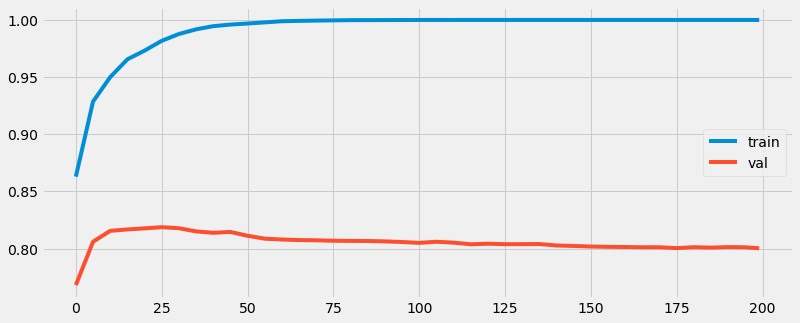

In [ ]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

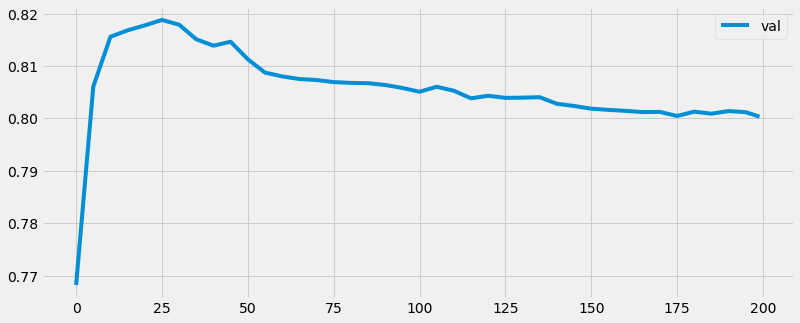

In [ ]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

* We can see better here that we are indeed overfitting  so it declines right the accuracy of the train, train stays at 100% but this one seems to decline so there are default parameters

# **6.8 XGBoost parameter tuning** (video 8)

Tuning the following parameters:

* eta = learning RATE = SIZE OF STEP
* max_depth
* min_child_weight = MIN_SAMPLES_LEAF IN RF

## Notes
___
XGBoost has various tunable parameters but the three most important ones are:

* eta (default=0.3)
  * It is also called learning_rate and is used to prevent overfitting by regularizing the weights of new features in each boosting step. range: [0, 1]
* max_depth (default=6)
  * Maximum depth of a tree. Increasing this value will make the model mroe complex and more likely to overfit. range: [0, inf]
* min_child_weight (default=1)
  * Minimum number of samples in leaf node. range: [0, inf]

For XGBoost models, there are other ways of finding the best parameters as well but the one we implement in the notebook follows the sequence of:

* First find the best value for eta
* Second, find the best value for max_depth
* Third, find the best value for min_child_weight

Other useful parameter are:

* subsample (default=1)
  * Subsample ratio of the training instances. Setting it to 0.5 means that model would randomly sample half of the trianing data prior to growing trees. range: (0, 1]
* colsample_bytree (default=1)
  * This is similar to the random forest, where each tree is made with a subset of randomly chosen features.
* lambda (default=1)
  * Also called reg_lambda. L2 regularization term on weights. Increasing this value will make the model more conservative.
* alpha (default=0)
  * Also called reg_alpha. L1 regularization term on weights. Increasing this value will make the model more conservative.


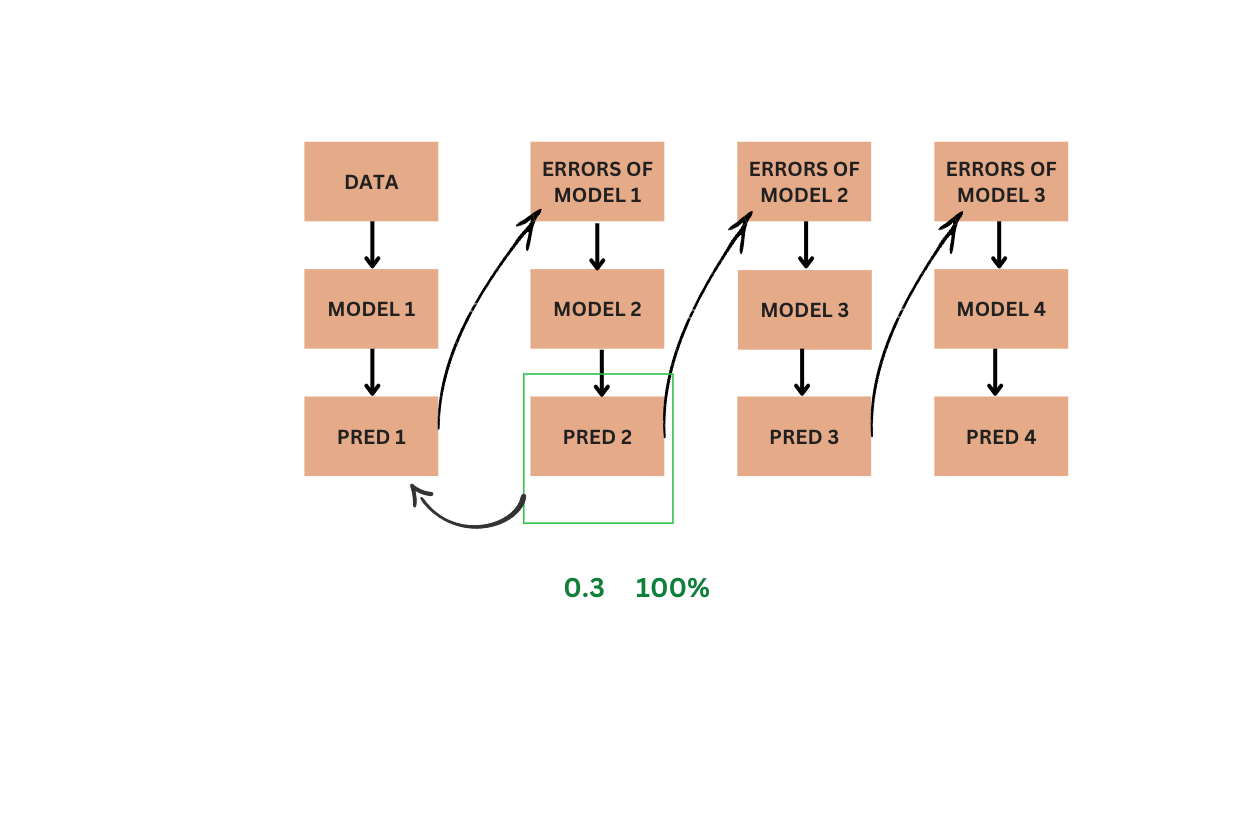

* When we train our second model and when we combine the predictions from the first model with the second model data says how much weight this second model has when it's correcting the results of the first model so if the weight is 1.0 then all the predictions are used to correct the predictions of the first model if we use only 0.3 the instead of adding these predictions 100 instead of correcting all 100 percent we use only 30 percent.

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [ ]:
scores

{'eta=0.3':     num_iter  train_auc   val_auc
 0          0   0.862996  0.768179
 1          5   0.928628  0.806056
 2         10   0.950021  0.815577
 3         15   0.965577  0.816803
 4         20   0.973165  0.817748
 5         25   0.981738  0.818783
 6         30   0.987718  0.817875
 7         35   0.991800  0.815096
 8         40   0.994562  0.813873
 9         45   0.995963  0.814624
 10        50   0.996881  0.811282
 11        55   0.997870  0.808739
 12        60   0.998887  0.808006
 13        65   0.999187  0.807509
 14        70   0.999439  0.807316
 15        75   0.999636  0.806922
 16        80   0.999847  0.806771
 17        85   0.999857  0.806710
 18        90   0.999915  0.806371
 19        95   0.999958  0.805802
 20       100   0.999985  0.805076
 21       105   0.999992  0.806032
 22       110   0.999999  0.805269
 23       115   1.000000  0.803822
 24       120   1.000000  0.804313
 25       125   1.000000  0.803913
 26       130   1.000000  0.803949
 27      

In [ ]:
scores['eta=0.3']

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.928628  0.806056
2         10   0.950021  0.815577
3         15   0.965577  0.816803
4         20   0.973165  0.817748
5         25   0.981738  0.818783
6         30   0.987718  0.817875
7         35   0.991800  0.815096
8         40   0.994562  0.813873
9         45   0.995963  0.814624
10        50   0.996881  0.811282
11        55   0.997870  0.808739
12        60   0.998887  0.808006
13        65   0.999187  0.807509
14        70   0.999439  0.807316
15        75   0.999636  0.806922
16        80   0.999847  0.806771
17        85   0.999857  0.806710
18        90   0.999915  0.806371
19        95   0.999958  0.805802
20       100   0.999985  0.805076
21       105   0.999992  0.806032
22       110   0.999999  0.805269
23       115   1.000000  0.803822
24       120   1.000000  0.804313
25       125   1.000000  0.803913
26       130   1.000000  0.803949
27       135   1.000000  0.804040
28       140   1.000000  0.802781
29       145   1.000000  0.802363
30       150   1.000000  0.801842
31       155   1.000000  0.801618
32       160   1.000000  0.801431
33       165   1.000000  0.801201
34       170   1.000000  0.801231
35       175   1.000000  0.800456
36       180   1.000000  0.801279
37       185   1.000000  0.800892
38       190   1.000000  0.801388
39       195   1.000000  0.801182
40       199   1.000000  0.800317

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [ ]:
scores

{'eta=0.3':     num_iter  train_auc   val_auc
 0          0   0.862996  0.768179
 1          5   0.928628  0.806056
 2         10   0.950021  0.815577
 3         15   0.965577  0.816803
 4         20   0.973165  0.817748
 5         25   0.981738  0.818783
 6         30   0.987718  0.817875
 7         35   0.991800  0.815096
 8         40   0.994562  0.813873
 9         45   0.995963  0.814624
 10        50   0.996881  0.811282
 11        55   0.997870  0.808739
 12        60   0.998887  0.808006
 13        65   0.999187  0.807509
 14        70   0.999439  0.807316
 15        75   0.999636  0.806922
 16        80   0.999847  0.806771
 17        85   0.999857  0.806710
 18        90   0.999915  0.806371
 19        95   0.999958  0.805802
 20       100   0.999985  0.805076
 21       105   0.999992  0.806032
 22       110   0.999999  0.805269
 23       115   1.000000  0.803822
 24       120   1.000000  0.804313
 25       125   1.000000  0.803913
 26       130   1.000000  0.803949
 27      

In [ ]:
scores['eta=1.0']

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.958517  0.790317
2         10   0.984353  0.777161
3         15   0.995496  0.781099
4         20   0.998242  0.780906
5         25   0.999797  0.782516
6         30   0.999953  0.778496
7         35   1.000000  0.775923
8         40   1.000000  0.776885
9         45   1.000000  0.777013
10        50   1.000000  0.777836
11        55   1.000000  0.778211
12        60   1.000000  0.780869
13        65   1.000000  0.783134
14        70   1.000000  0.781850
15        75   1.000000  0.780300
16        80   1.000000  0.780954
17        85   1.000000  0.780567
18        90   1.000000  0.782104
19        95   1.000000  0.781675
20       100   1.000000  0.782610
21       105   1.000000  0.782492
22       110   1.000000  0.783582
23       115   1.000000  0.783939
24       120   1.000000  0.783455
25       125   1.000000  0.783818
26       130   1.000000  0.784490
27       135   1.000000  0.783885
28       140   1.000000  0.783800
29       145   1.000000  0.783576
30       150   1.000000  0.783636
31       155   1.000000  0.783170
32       160   1.000000  0.783803
33       165   1.000000  0.783951
34       170   1.000000  0.783969
35       175   1.000000  0.784048
36       180   1.000000  0.784000
37       185   1.000000  0.784139
38       190   1.000000  0.784611
39       195   1.000000  0.783503
40       199   1.000000  0.783939

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [ ]:
scores['eta=0.1']

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.896878  0.798552
2         10   0.915579  0.800087
3         15   0.930188  0.807074
4         20   0.939329  0.809196
5         25   0.947933  0.812023
6         30   0.954113  0.815571
7         35   0.958999  0.815992
8         40   0.963321  0.818426
9         45   0.967552  0.822258
10        50   0.970138  0.823482
11        55   0.973108  0.824299
12        60   0.976407  0.824456
13        65   0.979629  0.823609
14        70   0.981241  0.824765
15        75   0.983090  0.823560
16        80   0.985672  0.823294
17        85   0.986959  0.823136
18        90   0.988179  0.823627
19        95   0.989690  0.823209
20       100   0.990559  0.823706
21       105   0.992041  0.823651
22       110   0.993053  0.823554
23       115   0.993817  0.822979
24       120   0.994342  0.822077
25       125   0.994715  0.820914
26       130   0.995097  0.820793
27       135   0.995535  0.820503
28       140   0.996063  0.820248
29       145   0.996519  0.820006
30       150   0.996897  0.819461
31       155   0.997202  0.819195
32       160   0.997406  0.819068
33       165   0.997688  0.818305
34       170   0.997943  0.818390
35       175   0.998213  0.818595
36       180   0.998316  0.818299
37       185   0.998433  0.817493
38       190   0.998742  0.817112
39       195   0.998961  0.817227
40       199   0.999145  0.817506

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [ ]:
scores

{'eta=0.3':     num_iter  train_auc   val_auc
 0          0   0.862996  0.768179
 1          5   0.928628  0.806056
 2         10   0.950021  0.815577
 3         15   0.965577  0.816803
 4         20   0.973165  0.817748
 5         25   0.981738  0.818783
 6         30   0.987718  0.817875
 7         35   0.991800  0.815096
 8         40   0.994562  0.813873
 9         45   0.995963  0.814624
 10        50   0.996881  0.811282
 11        55   0.997870  0.808739
 12        60   0.998887  0.808006
 13        65   0.999187  0.807509
 14        70   0.999439  0.807316
 15        75   0.999636  0.806922
 16        80   0.999847  0.806771
 17        85   0.999857  0.806710
 18        90   0.999915  0.806371
 19        95   0.999958  0.805802
 20       100   0.999985  0.805076
 21       105   0.999992  0.806032
 22       110   0.999999  0.805269
 23       115   1.000000  0.803822
 24       120   1.000000  0.804313
 25       125   1.000000  0.803913
 26       130   1.000000  0.803949
 27      

In [ ]:
scores['eta=0.05']

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.878850  0.779213
2         10   0.895767  0.799978
3         15   0.907896  0.802412
4         20   0.916153  0.803205
5         25   0.922287  0.804930
6         30   0.927503  0.806883
7         35   0.931773  0.810413
8         40   0.936325  0.810198
9         45   0.941836  0.811306
10        50   0.944919  0.811509
11        55   0.948742  0.813694
12        60   0.951015  0.812689
13        65   0.953656  0.812750
14        70   0.956094  0.812919
15        75   0.958260  0.815256
16        80   0.960791  0.816818
17        85   0.962626  0.818063
18        90   0.964725  0.819631
19        95   0.966300  0.820545
20       100   0.968269  0.820781
21       105   0.969730  0.821804
22       110   0.970918  0.822204
23       115   0.972147  0.822573
24       120   0.973522  0.822967
25       125   0.974768  0.823015
26       130   0.976000  0.822937
27       135   0.977215  0.822809
28       140   0.978510  0.822688
29       145   0.979592  0.822343
30       150   0.980889  0.821423
31       155   0.981688  0.821042
32       160   0.982626  0.820581
33       165   0.983418  0.820497
34       170   0.984183  0.820176
35       175   0.985229  0.820412
36       180   0.986002  0.820091
37       185   0.986816  0.819479
38       190   0.987244  0.820279
39       195   0.988055  0.820303
40       199   0.988639  0.820079

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [ ]:
scores

{'eta=0.3':     num_iter  train_auc   val_auc
 0          0   0.862996  0.768179
 1          5   0.928628  0.806056
 2         10   0.950021  0.815577
 3         15   0.965577  0.816803
 4         20   0.973165  0.817748
 5         25   0.981738  0.818783
 6         30   0.987718  0.817875
 7         35   0.991800  0.815096
 8         40   0.994562  0.813873
 9         45   0.995963  0.814624
 10        50   0.996881  0.811282
 11        55   0.997870  0.808739
 12        60   0.998887  0.808006
 13        65   0.999187  0.807509
 14        70   0.999439  0.807316
 15        75   0.999636  0.806922
 16        80   0.999847  0.806771
 17        85   0.999857  0.806710
 18        90   0.999915  0.806371
 19        95   0.999958  0.805802
 20       100   0.999985  0.805076
 21       105   0.999992  0.806032
 22       110   0.999999  0.805269
 23       115   1.000000  0.803822
 24       120   1.000000  0.804313
 25       125   1.000000  0.803913
 26       130   1.000000  0.803949
 27      

In [ ]:
scores['eta=0.01']

num_iter  train_auc   val_auc
0          0   0.862996  0.768179
1          5   0.864195  0.770141
2         10   0.870406  0.771418
3         15   0.873018  0.770501
4         20   0.875409  0.775263
5         25   0.878590  0.778611
6         30   0.881625  0.783685
7         35   0.882893  0.785519
8         40   0.886486  0.790030
9         45   0.889713  0.794323
10        50   0.892991  0.796835
11        55   0.897257  0.799663
12        60   0.900339  0.801216
13        65   0.902251  0.800598
14        70   0.903689  0.799696
15        75   0.905767  0.800683
16        80   0.907325  0.801419
17        85   0.908914  0.801422
18        90   0.910693  0.802360
19        95   0.912345  0.802956
20       100   0.914283  0.804222
21       105   0.916206  0.804954
22       110   0.917593  0.805699
23       115   0.918964  0.806474
24       120   0.920102  0.806771
25       125   0.921146  0.806913
26       130   0.922324  0.806698
27       135   0.923628  0.806880
28       140   0.924671  0.807631
29       145   0.925887  0.808024
30       150   0.927090  0.808902
31       155   0.927926  0.809483
32       160   0.929011  0.809532
33       165   0.930107  0.809753
34       170   0.930615  0.810252
35       175   0.931234  0.810749
36       180   0.932202  0.810882
37       185   0.933511  0.810900
38       190   0.934394  0.811045
39       195   0.935590  0.810912
40       199   0.936479  0.811282

In [ ]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

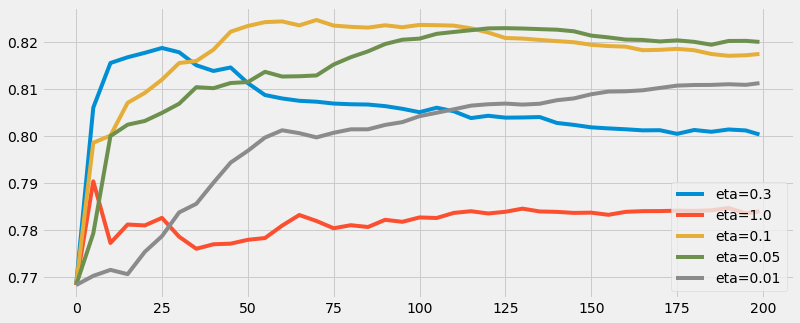

In [ ]:
for key, df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

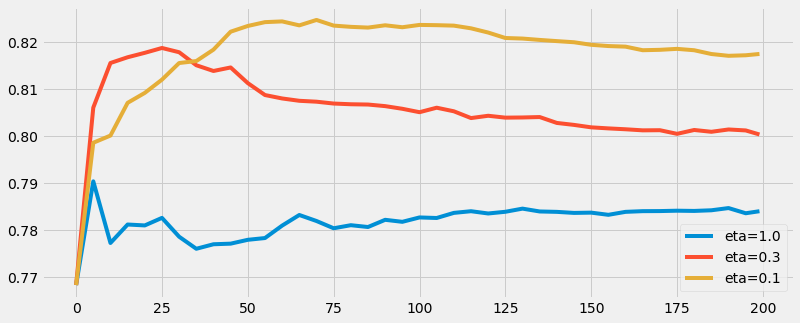

In [ ]:
etas =['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()


* This is our eta 1.0,0.3,0.1, and 1.0 is worst quite quickly around the first five iterations you get k performance but the it drope and it stays at quite bit level then the next one is 0.3 we saw it already it has quite an okay you see at iteration number 25 and then it goes down like that when it comes to 0.1 it grows slower it reaches the peak around 75 and then it starts to decline this is what learning rate is about we can see how fast the model learns but also how large the steps are that the model takes with each new iteration and if the steps are too large then the model would learn something quite fast but then at some point starts to degrade because the steps are too large so it starts overfitting but this model needs more iteration still it becomes better but even though it needs more iterations it learns slower but learns better and then it starts degrading it also doesn't overfit as fast as this 0.3.

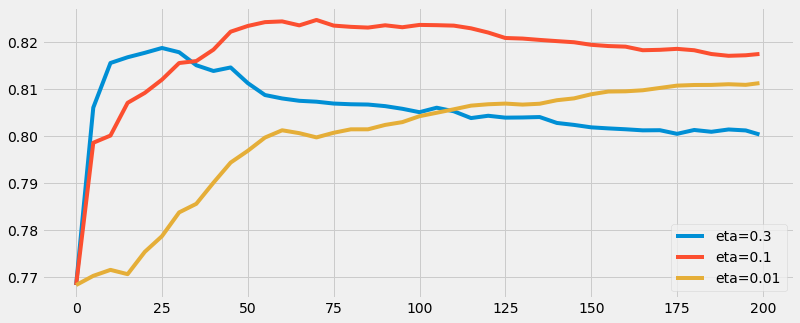

In [ ]:
etas =['eta=0.3', 'eta=0.1', 'eta=0.01']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

* eta=0.3, eta=0.1, eta=0.01, for this 0.01 it's very slow it learns slowly slowly slowly slowly, we don't know how much time it needs maybe it will be eventually better than this one but it just need too many iterations so it takes forever to learn so thi is  too slow so the steps it makes are tiny that's why it takes forever for this model to learn while for 0.3 it takes quite a few big steps but then it also starts overfitting faster so maybe eventually this one better but we just need to spend too much time computing this and seeing if it will be or not this 0.1 seems to be in the sweet spot it needs quite a few iterations but then the performance is also better.

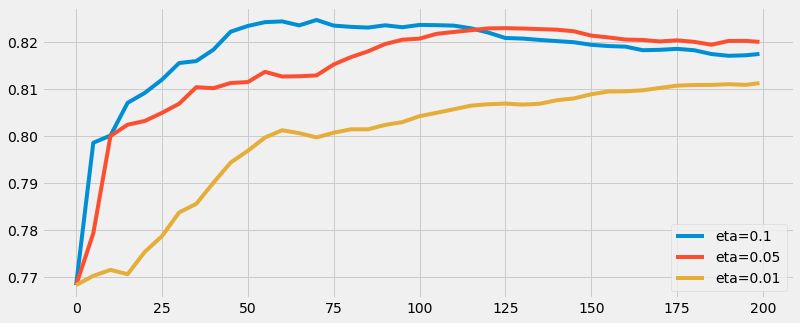

In [ ]:
etas =['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

* 0.05 it takes approximately two times more to converge so here it's 60 and here it's around 130 or maybe it's 70 something like this it takes two times more iterations to reach the peak and this peak is even lower than this one so even though it takes smaller steps and it takes two times more iterations to learn and then the result is still a bit worse than this one given that this model with 0.1 seems like the best so it doesn't need a lot of trees and it has the best performance from that point of view at of 0.1 is the best parameters.

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

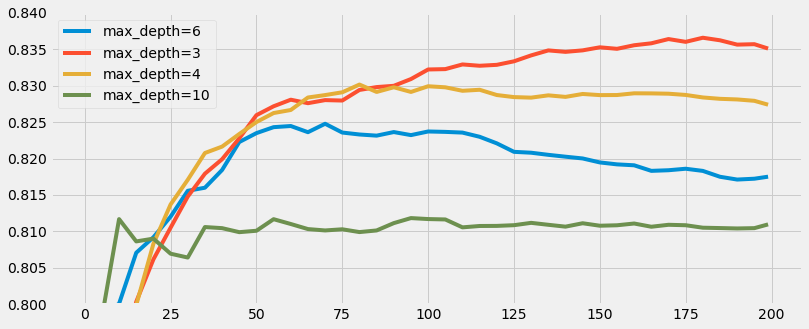

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

* This max_depth= 10 is worse it quickly gets higher scores it gets good score before others we see that if we look at the iteration here then is the best one among all four but then the performance after iteration 10 stagnate it doesn't improve while for others they keep growing to keep growing and then here they diverge.

* Let's remove max_depth 10 

In [ ]:
del scores['max_depth=10']

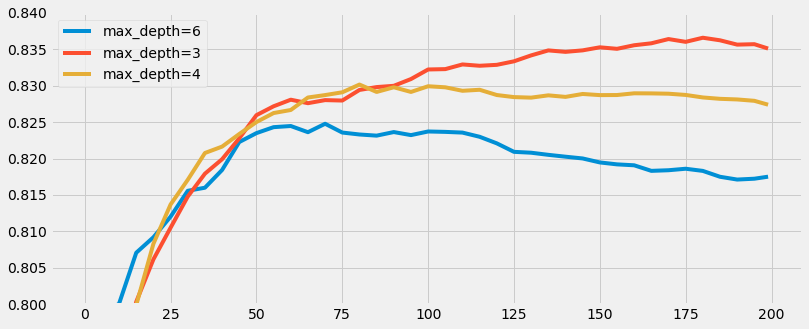

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

* max_depth 6 always is worse than the others and then it also goes down faster, the max_depth 4 kind of stagnates also after 75 iterations but this max_depth 4 keeps growing least until going to 175 iterations and gets pretty good scores.
* Therefore we conclude that the max_depth 3 is the best depth.  

In [ ]:
#scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [ ]:
del scores['max_depth=6']
del scores['max_depth=3']
del scores['max_depth=4']

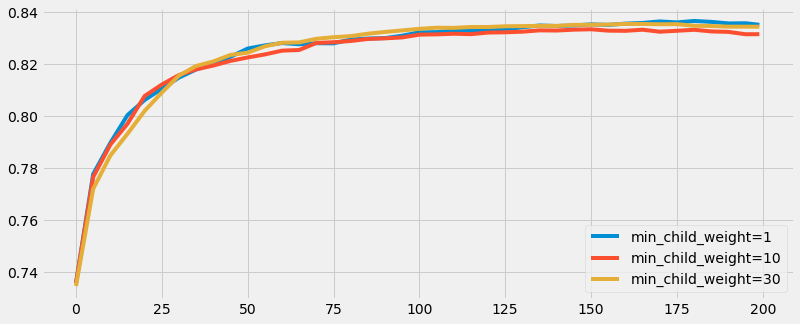

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

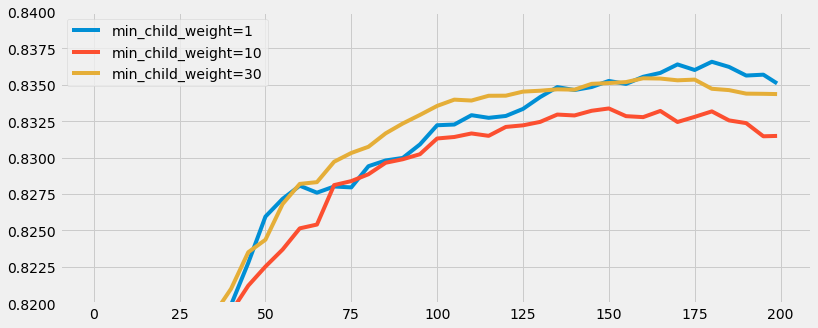

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

* It means this is our final model, min_child_weight= 30
* How many iterations do we want to train I think 175 seems like a good spot let's train our model for 175 iterations.
* This will be our final model and xgboost model.

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

* This is our final model.

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

* subsample and colsample_bytree
* lambda and alpha

# **6.9 Selecting the final model** (video 9)

* Choosing between xgboost, random forest, and decision tree
* Training the final model
* Saving the model

## Notes
____
We select the final model from the decision tree, random forest, or xgboost based on the best AUC scores. After that, we prepare the df_full_train and df_test to train and evaluate the final model. If there is not much difference between model AUC scores on the train as well as test data then the model has generalized the patterns well enough.

Generally, XGBoost models perform better on tabular data than other machine learning models but the downside is that these model are easy to overfit cause of the high number of hyperparameter. Therefore, XGBoost models require a lot more attention for parameters tuning to optimize them.

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.785470804775859

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

* We want to relate these three models, to the validation dataset and select the best one we probably already know what is the best model we already saw
* We will evaluate the predictions so far for decision tree consolidation, this is our performance of decision tree 78.5 percent, then for the random forest, and then let's do the final one with random forest.
* We have our final model and now let's evaluate it the model predicts the test.
* Xgboost is the best model performance.

In [ ]:
df_full_train

status  seniority     home  time  age  marital records        job  \
3668       ok         22    owner    48   48  married      no      fixed   
2540  default          8    other    60   41  married      no  freelance   
279        ok          2  parents    36   19  married      no      fixed   
3536       ok          1    owner    12   61  married      no     others   
3866       ok         13    owner    60   27  married      no      fixed   
...       ...        ...      ...   ...  ...      ...     ...        ...   
332   default          4    owner    60   47  married      no  freelance   
1293       ok          2     rent    60   28   single      no      fixed   
4023       ok          2  parents    36   25   single      no      fixed   
3775       ok          4    other    60   25   single      no      fixed   
1945  default          1  parents    48   25   single      no  freelance   

      expenses  income   assets   debt  amount  price  
3668        60   110.0   3000.0    0.0    1000   1460  
2540        45    62.0      0.0    0.0    1800   2101  
279         35   162.0   4000.0  100.0     400    570  
3536        45   103.0  20000.0    0.0     300    650  
3866        35   253.0   7000.0    0.0    1060   1750  
...        ...     ...      ...    ...     ...    ...  
332         75     0.0  13500.0    0.0    1900   1976  
1293        45   101.0      0.0    0.0    1300   1333  
4023        35   110.0      0.0    0.0     500   1200  
3775        35   162.0      0.0    0.0    1800   2999  
1945        35     0.0      0.0    0.0    1800   1809  

[3563 rows x 14 columns]

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [ ]:
del df_full_train['status']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
y_pred[:10]

array([0.24035443, 0.18355751, 0.0865014 , 0.23431301, 0.3524028 ,
       0.28965375, 0.00877119, 0.02481344, 0.21857312, 0.23013479],
      dtype=float32)

In [ ]:
roc_auc_score(y_test, y_pred)

0.8322662626460096

* This is our final model tuned out that xgboost has the best performance.
* Xgboost is one of the best models at least for tabular data meaning when we have a dataframe with features for this kind of dataset usually xgboost tends to have better performance than any other model.
* More difficult to tune because it has a lot of parameters.

# **6.10 Summary**

* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.

# **6.11 Explore more**

* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check max_features and bootstrap.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in ExtraTreesClassifier. Try it for this project.
* XGBoost can deal with NAs - we don't have to do fillna for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: subsample and colsample_bytree.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for random forest (it's the same for plain decision trees) and for xgboost
* Trees can also be used for solving the regression problems: check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost.